# Libraries

In [1]:
import numpy as np
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from  sklearn.impute import KNNImputer

# Load Data

In [2]:
# polutan_1 = pd.read_csv('../Pollutants/2021 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
# polutan_2 = pd.read_csv('../Pollutants/2022 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
polutan_2023 = pd.read_csv('../Pollutants/2023 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
# polutan_2024 = pd.read_csv('../Pollutants/2024 - Indeks Standar Pencemaran Udara (ISPU).csv', sep=';', decimal='.')
polutan_2024 = pd.read_csv('../Pollutants/2024 - Indeks Standar Pencemar Udara (ISPU) Jan-Dec.csv', sep=';', decimal='.')

cuaca_kemayoran = pd.read_csv('../Meteorological Kemayoran/kemayoran 2023 - 2024.csv', sep=';', decimal='.')
# cuaca_tanjung_priok = pd.read_csv('../Meteorological Tanjung Priok/tanjung priok 2023-2024.csv', sep=';', decimal='.')

imputed_data_polutan_meteorologi = pd.read_csv('./preprocessed_main_data_dki1_kemayoran_v2.csv', sep=';', decimal='.')
# DKI 1: Bundaran HI (Jakarta Pusat)
# DKI 2: Kelapa Gading (Jakarta Utara)
# DKI 3: Jagakarsa (Jakarta Selatan)
# DKI 4: Lubang buaya (Jakarta Timur)
# DKI 5: Kebon Jeruk (Jakarta Barat)

# Preprocessing Data

Processing Data mencakup:
1. Data Polutan
    - menyamakan format data kosong ke None
    - Memasukkan data polutan per DKI ke axis kolom, agar tidak ada baris tanggal yang duplikat dan agar bisa digabungkan dengan data cuaca
2. Data Cuaca

beberapa yang preprocess manual:

2021
1. Rename value kolom stasiun
    - DKI1 (Bundaran HI) -> DKI1
    - DKI2 (Kelapa Gading) -> DKI2
    - DKI3 (Jagakarsa) -> DKI3
    - DKI4 (Lubang buaya) -> DKI4
    - DKI5 (Kebon Jeruk) -> DKI5

2022
1. lokasi_spku -> stasiun
2. typo pada periode 202202, tahun 2020 -> 2022

2023
1. Rename value kolom stasiun:
    - DKI5 Kebon Jeruk Jakarta Barat & DKI5 Kebon Jeruk -> DKI5
    - DKI1 Bunderan HI -> DKI1
    - DKI2 Kelapa Gading -> DKI2
    - DKI3 Jagakarsa -> DKI3
    - DKI4 Lubang Buaya -> DKI4
2. Rename value parameter pencemar kritis
    - 2 -> PM25
    - 1 -> PM10
    - 5 -> O3
    - 3 -> SO2
3. typo pada periode 202212 -> 202312, 2022 -> 2023

2024
1. Rename value kolom stasiun:
    - DKI5 Kebon Jeruk Jakarta Barat & DKI5 Kebon Jeruk -> DKI5
    - DKI1 Bunderan HI & DKI1 Bundaran Hotel Indonesia (HI) -> DKI1
    - DKI2 Kelapa Gading -> DKI2
    - DKI3 Jagakarsa -> DKI3
    - DKI4 Lubang Buaya -> DKI4

2. Rename value kolom stasiun (Updated on 12 Maret 2025):
    - DKI1 Bunderan HI & DKI1 Bundaran Hotel Indonesia (HI) -> DKI1
    - DKI2 Kelapa Gading -> DKI2
    - DKI3 Jagakarsa -> DKI3
    - DKI4 Lubang Buaya -> DKI4
    - DKI5 Kebon Jeruk Jakarta Barat & DKI5 Kebon Jeruk -> DKI5

## Data Meteorologi

In [3]:
cuaca_kemayoran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tanggal    731 non-null    object 
 1   Tavg       726 non-null    object 
 2   RH_avg     728 non-null    float64
 3   RR         577 non-null    object 
 4   ss         722 non-null    object 
 5   ff_avg     730 non-null    float64
 6   DDD_CAR    730 non-null    object 
 7   lat        731 non-null    float64
 8   long       731 non-null    float64
 9   elevation  731 non-null    int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 57.2+ KB


Arah Angin

- (1) C: Calm
- (2) N: North
- (3) NE: North East
- (4) E: East
- (5) SE: South East
- (6) S: South
- (7) SW: South West
- (8) W: West
- (9) NW: North West

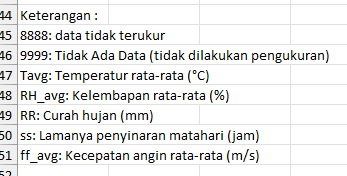

data di 23 oktober 2023 completely blank, use other imputation method

In [4]:
cuaca_kemayoran.head()

Tanggal  Tavg  RH_avg    RR   ss  ff_avg DDD_CAR       lat    long  \
0  01-01-2023  26,3    87.0  14,5    0     1.0      C  -6.155559  106.84   
1  02-01-2023  27,5    81.0  31,5  0,7     2.0      NW -6.155559  106.84   
2  03-01-2023  26,6    82.0   0,5    0     1.0      C  -6.155559  106.84   
3  04-01-2023  26,4    86.0   2,4  NaN     1.0      C  -6.155559  106.84   
4  05-01-2023  27,4    83.0  35,3  NaN     2.0      C  -6.155559  106.84   

   elevation  
0          4  
1          4  
2          4  
3          4  
4          4

In [5]:
cuaca_kemayoran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tanggal    731 non-null    object 
 1   Tavg       726 non-null    object 
 2   RH_avg     728 non-null    float64
 3   RR         577 non-null    object 
 4   ss         722 non-null    object 
 5   ff_avg     730 non-null    float64
 6   DDD_CAR    730 non-null    object 
 7   lat        731 non-null    float64
 8   long       731 non-null    float64
 9   elevation  731 non-null    int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 57.2+ KB


### Kemayoran

In [6]:
cuaca_kemayoran = cuaca_kemayoran.drop(columns=['lat', 'long', 'elevation'])

In [7]:
cuaca_kemayoran.head()

Tanggal  Tavg  RH_avg    RR   ss  ff_avg DDD_CAR
0  01-01-2023  26,3    87.0  14,5    0     1.0      C 
1  02-01-2023  27,5    81.0  31,5  0,7     2.0      NW
2  03-01-2023  26,6    82.0   0,5    0     1.0      C 
3  04-01-2023  26,4    86.0   2,4  NaN     1.0      C 
4  05-01-2023  27,4    83.0  35,3  NaN     2.0      C

In [8]:
for i in range(len(cuaca_kemayoran['Tanggal'])):
  cuaca_kemayoran.loc[i, 'Tanggal'] = datetime.strptime(cuaca_kemayoran['Tanggal'][i], '%d-%m-%Y').date()
  
# for i in range(len(cuaca_tanjung_priok['Tanggal'])):
#   cuaca_tanjung_priok.loc[i, 'Tanggal'] = datetime.strptime(cuaca_tanjung_priok['Tanggal'][i], '%d-%m-%Y').date()

In [9]:
type(cuaca_kemayoran['Tanggal'][0])

datetime.date

In [10]:
cuaca_kemayoran[['Tavg', 'RR', 'ss']] = cuaca_kemayoran[['Tavg', 'RR', 'ss']].apply(lambda x: x.str.replace(',','.'))
cuaca_kemayoran[['RR', 'ss']] = cuaca_kemayoran[['RR', 'ss']].replace('-', np.nan)
cuaca_kemayoran[['Tavg', 'RR', 'ss']] = cuaca_kemayoran[['Tavg', 'RR', 'ss']].astype(float)

In [11]:
print(cuaca_kemayoran['DDD_CAR'].unique())
cuaca_kemayoran['DDD_CAR'] = cuaca_kemayoran['DDD_CAR'].str.strip()
print("Kemayoran DDD_CAR stripped: ", cuaca_kemayoran['DDD_CAR'].unique())

['C ' 'NW' 'W ' 'S ' 'E ' nan 'SW' 'C' 'E' 'N' 'W']
Kemayoran DDD_CAR stripped:  ['C' 'NW' 'W' 'S' 'E' nan 'SW' 'N']


In [12]:
cuaca_kemayoran

Tanggal  Tavg  RH_avg    RR   ss  ff_avg DDD_CAR
0    2023-01-01  26.3    87.0  14.5  0.0     1.0       C
1    2023-01-02  27.5    81.0  31.5  0.7     2.0      NW
2    2023-01-03  26.6    82.0   0.5  0.0     1.0       C
3    2023-01-04  26.4    86.0   2.4  NaN     1.0       C
4    2023-01-05  27.4    83.0  35.3  NaN     2.0       C
..          ...   ...     ...   ...  ...     ...     ...
726  2024-12-27  29.2    78.0   NaN  1.2     2.0       C
727  2024-12-28  30.0    70.0   NaN  3.8     2.0       C
728  2024-12-29  29.7    73.0   NaN  3.0     1.0       C
729  2024-12-30  28.4    76.0   1.0  1.8     2.0      SW
730  2024-12-31  28.4    76.0   2.0  2.4     2.0       W

[731 rows x 7 columns]

In [13]:
cuaca_kemayoran['DDD_CAR'] = cuaca_kemayoran['DDD_CAR'].replace({
  'C': 1,
  'N': 2,
  'NE': 3,
  'E': 4,
  'SE': 5,
  'S': 6,
  'SW': 7,
  'W': 8,
  'NW': 9
})
cuaca_kemayoran['DDD_CAR'].unique()

C:\Users\stevanus.febrian\AppData\Local\Temp\ipykernel_29988\2679687321.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cuaca_kemayoran['DDD_CAR'] = cuaca_kemayoran['DDD_CAR'].replace({


array([ 1.,  9.,  8.,  6.,  4., nan,  7.,  2.])

In [14]:
cuaca_kemayoran['DDD_CAR']

0      1.0
1      9.0
2      1.0
3      1.0
4      1.0
      ... 
726    1.0
727    1.0
728    1.0
729    7.0
730    8.0
Name: DDD_CAR, Length: 731, dtype: float64

In [15]:
cuaca_kemayoran = cuaca_kemayoran.replace([8888.0, 9999.0], np.nan)

In [16]:
cuaca_kemayoran_processed = cuaca_kemayoran.copy()

In [17]:
cuaca_kemayoran_processed

Tanggal  Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
0    2023-01-01  26.3    87.0  14.5  0.0     1.0      1.0
1    2023-01-02  27.5    81.0  31.5  0.7     2.0      9.0
2    2023-01-03  26.6    82.0   0.5  0.0     1.0      1.0
3    2023-01-04  26.4    86.0   2.4  NaN     1.0      1.0
4    2023-01-05  27.4    83.0  35.3  NaN     2.0      1.0
..          ...   ...     ...   ...  ...     ...      ...
726  2024-12-27  29.2    78.0   NaN  1.2     2.0      1.0
727  2024-12-28  30.0    70.0   NaN  3.8     2.0      1.0
728  2024-12-29  29.7    73.0   NaN  3.0     1.0      1.0
729  2024-12-30  28.4    76.0   1.0  1.8     2.0      7.0
730  2024-12-31  28.4    76.0   2.0  2.4     2.0      8.0

[731 rows x 7 columns]

#### Missing Values

In [18]:
print("Jumlah Tavg Tidak Valid:", cuaca_kemayoran_processed[cuaca_kemayoran_processed['Tavg'].isin([9999.0, 8888.0])]['Tavg'].count())
print("Jumlah RR Tidak Valid:", cuaca_kemayoran_processed[cuaca_kemayoran_processed['RH_avg'].isin([9999.0, 8888.0])]['RH_avg'].count())
print("Jumlah RR Tidak Valid:", cuaca_kemayoran_processed[cuaca_kemayoran_processed['RR'].isin([9999.0, 8888.0])]['RR'].count())
print("Jumlah ss Tidak Valid:", cuaca_kemayoran_processed[cuaca_kemayoran_processed['ss'].isin([9999.0, 8888.0])]['ss'].count())
print("Jumlah ss Tidak Valid:", cuaca_kemayoran_processed[cuaca_kemayoran_processed['ff_avg'].isin([9999.0, 8888.0])]['ff_avg'].count())

Jumlah Tavg Tidak Valid: 0
Jumlah RR Tidak Valid: 0
Jumlah RR Tidak Valid: 0
Jumlah ss Tidak Valid: 0
Jumlah ss Tidak Valid: 0


In [19]:
# invalid_values = [9999.0, 8888.0]

condition = (
    cuaca_kemayoran_processed['Tavg'].isna() |
    cuaca_kemayoran_processed['RH_avg'].isna() |
    cuaca_kemayoran_processed['RR'].isna() |
    cuaca_kemayoran_processed['ss'].isna() |
    cuaca_kemayoran_processed['ff_avg'].isna()
)

count = cuaca_kemayoran_processed[condition].shape[0]

print("Count of rows containing missing value:", count)

Count of rows containing missing value: 200


total row: 1440

rows contain null: 434

30.14% data null

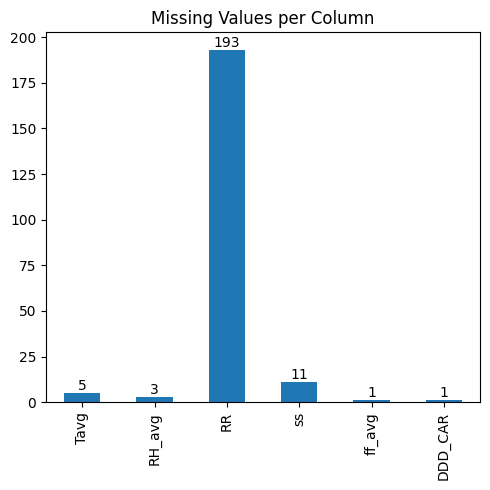

In [20]:
cuaca_kemayoran_processed = cuaca_kemayoran_processed.set_index('Tanggal')

missing_counts = cuaca_kemayoran_processed.isnull().sum()

plt.figure(figsize=(5,5))
ax = missing_counts.plot(kind='bar', title='Missing Values per Column')

for i, value in enumerate(missing_counts):
    ax.text(i, value, str(value), ha='center', va='bottom', rotation=0)
plt.tight_layout()
plt.show()

In [21]:
cuaca_kemayoran_processed[cuaca_kemayoran_processed['ff_avg'].isna()]

Tavg  RH_avg  RR  ss  ff_avg  DDD_CAR
Tanggal                                          
2023-10-23   NaN     NaN NaN NaN     NaN      NaN

In [22]:
cuaca_kemayoran_processed[cuaca_kemayoran_processed.isnull().any(axis=1)]

Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
Tanggal                                             
2023-01-04  26.4    86.0   2.4  NaN     1.0      1.0
2023-01-05  27.4    83.0  35.3  NaN     2.0      1.0
2023-01-08  28.1    76.0   NaN  8.0     2.0      1.0
2023-01-09  29.0    73.0   NaN  3.8     3.0      9.0
2023-01-10  30.1    65.0   NaN  5.0     1.0      1.0
...          ...     ...   ...  ...     ...      ...
2024-12-24  28.0    79.0  17.0  NaN     1.0      1.0
2024-12-26  29.4    74.0   8.0  NaN     1.0      1.0
2024-12-27  29.2    78.0   NaN  1.2     2.0      1.0
2024-12-28  30.0    70.0   NaN  3.8     2.0      1.0
2024-12-29  29.7    73.0   NaN  3.0     1.0      1.0

[200 rows x 6 columns]

#### Outliers Boxplot

#### EDA Univariate

In [23]:
# cuaca_kemayoran_processed.info()

In [24]:
# cuaca_kemayoran_processed.describe()

In [25]:
# cuaca_kemayoran_processed.plot(y='Tavg', figsize=(11,6))

# cuaca_kemayoran_processed.plot(y='RH_avg', figsize=(11,6))

# cuaca_kemayoran_processed.plot(y='RR', figsize=(11,6))

# cuaca_kemayoran_processed.plot(y='ss', figsize=(11,6))

# cuaca_kemayoran_processed.plot(y='ff_avg', figsize=(11,6))

# cuaca_kemayoran_processed.plot(y='DDD_CAR', figsize=(11,6))
# plt.show()

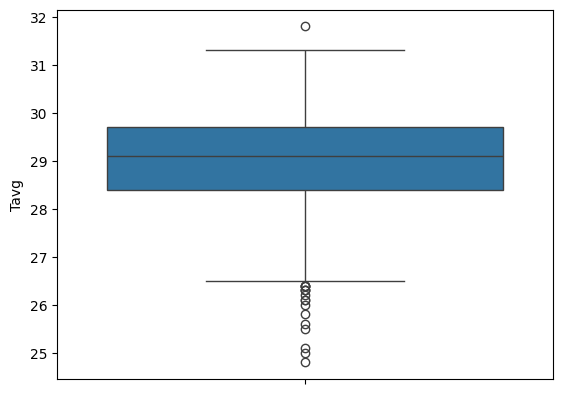

In [26]:
sns.boxplot(y=cuaca_kemayoran_processed['Tavg'])
plt.show()

In [27]:
Q1 = cuaca_kemayoran_processed['Tavg'].quantile(0.25)
Q3 = cuaca_kemayoran_processed['Tavg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

tavg_outliers = cuaca_kemayoran_processed[(cuaca_kemayoran_processed['Tavg'] < lower_bound) | (cuaca_kemayoran_processed['Tavg'] > upper_bound)]
tavg_outliers

Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
Tanggal                                             
2023-01-01  26.3    87.0  14.5  0.0     1.0      1.0
2023-01-04  26.4    86.0   2.4  NaN     1.0      1.0
2023-01-28  25.6    94.0  26.9  0.0     0.0      1.0
2023-02-12  25.0    92.0  40.8  1.5     2.0      8.0
2023-02-24  25.8    94.0  76.9  3.6     1.0      1.0
2023-03-02  25.1    92.0  79.5  0.5     0.0      1.0
2023-03-15  25.5    90.0  11.0  0.0     1.0      1.0
2023-03-30  26.3    92.0   NaN  NaN     0.0      1.0
2023-06-16  26.2    94.0   0.0  2.0     0.0      1.0
2023-10-17  31.8    60.0   0.0  8.0     2.0      1.0
2023-11-25  26.1    89.0   3.5  1.0     0.0      1.0
2024-01-19  26.4    85.0   7.7  1.0     2.0      8.0
2024-01-27  26.3    90.0  14.0  2.5     0.0      1.0
2024-02-06  26.4    86.0   6.8  3.4     1.0      1.0
2024-02-29  26.1    92.0  75.5  0.3     0.0      1.0
2024-03-16  26.0    91.0   6.5  0.0     1.0      1.0
2024-03-22  26.4    91.0  63.3  9.0     0.0      1.0
2024-07-06  24.8    92.0  15.3  4.2     0.0      1.0

Text(0, 0.5, 'counts')

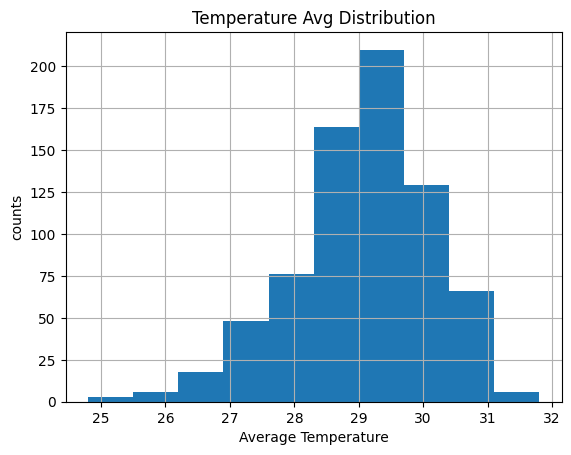

In [28]:
cuaca_kemayoran_processed['Tavg'].hist()
plt.title('Temperature Avg Distribution')
plt.xlabel('Average Temperature')
plt.ylabel('counts')

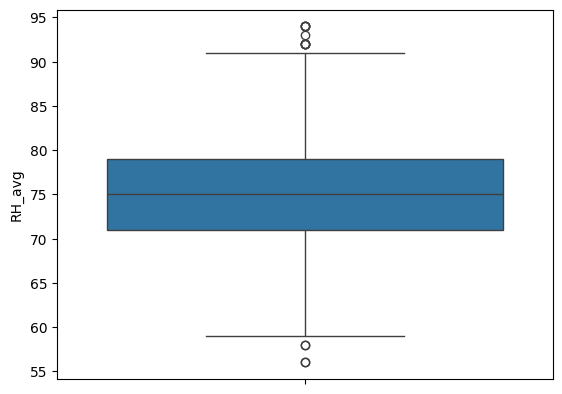

In [29]:
sns.boxplot(y=cuaca_kemayoran_processed['RH_avg'])
plt.show()

Text(0, 0.5, 'count')

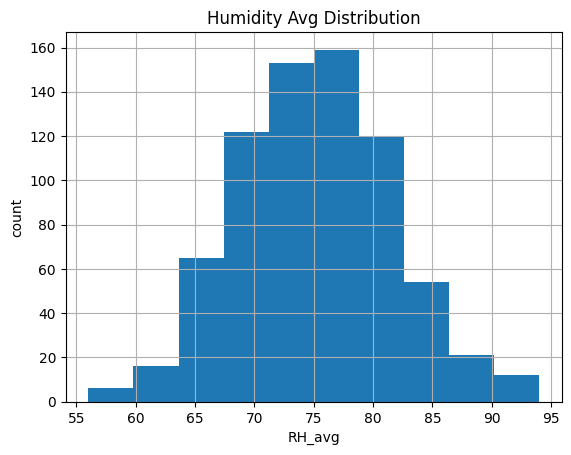

In [30]:
cuaca_kemayoran_processed['RH_avg'].hist()
plt.title('Humidity Avg Distribution')
plt.xlabel('RH_avg')
plt.ylabel('count')

In [31]:
Q1 = cuaca_kemayoran_processed['RH_avg'].quantile(0.25)
Q3 = cuaca_kemayoran_processed['RH_avg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rh_outliers = cuaca_kemayoran_processed[(cuaca_kemayoran_processed['RH_avg'] < lower_bound) | (cuaca_kemayoran_processed['RH_avg'] > upper_bound)]
rh_outliers

Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
Tanggal                                             
2023-01-28  25.6    94.0  26.9  0.0     0.0      1.0
2023-02-12  25.0    92.0  40.8  1.5     2.0      8.0
2023-02-24  25.8    94.0  76.9  3.6     1.0      1.0
2023-03-02  25.1    92.0  79.5  0.5     0.0      1.0
2023-03-30  26.3    92.0   NaN  NaN     0.0      1.0
2023-04-06  30.3    56.0   0.0  9.2     1.0      1.0
2023-06-16  26.2    94.0   0.0  2.0     0.0      1.0
2023-09-27  29.8    58.0   0.0  9.0     1.0      1.0
2023-09-28  30.0    58.0   0.0  9.8     1.0      1.0
2023-12-20  30.3    56.0   NaN  NaN     1.0      1.0
2024-02-29  26.1    92.0  75.5  0.3     0.0      1.0
2024-03-09   NaN    94.0   4.2  0.5     0.0      1.0
2024-07-06  24.8    92.0  15.3  4.2     0.0      1.0
2024-12-23  26.9    93.0  44.0  2.5     1.0      1.0

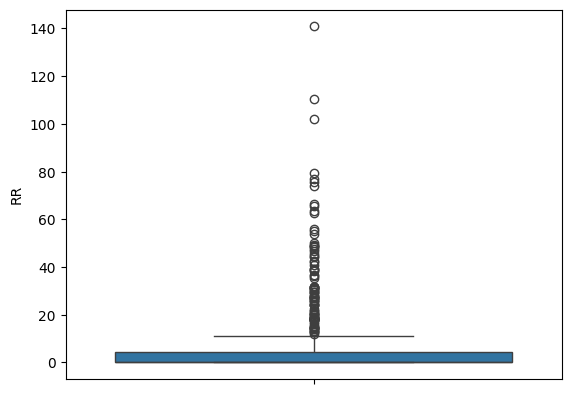

In [32]:
sns.boxplot(y=cuaca_kemayoran_processed['RR'])
plt.show()

In [33]:
cuaca_kemayoran_processed['RR'].max()

np.float64(140.9)

Text(0, 0.5, 'count')

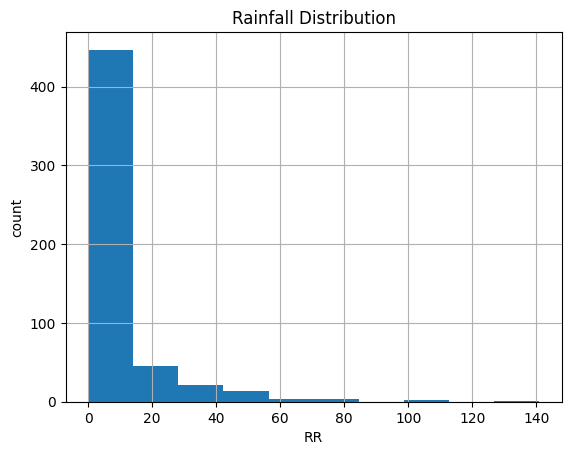

In [34]:
cuaca_kemayoran_processed['RR'].hist()
plt.title('Rainfall Distribution')
plt.xlabel('RR')
plt.ylabel('count')

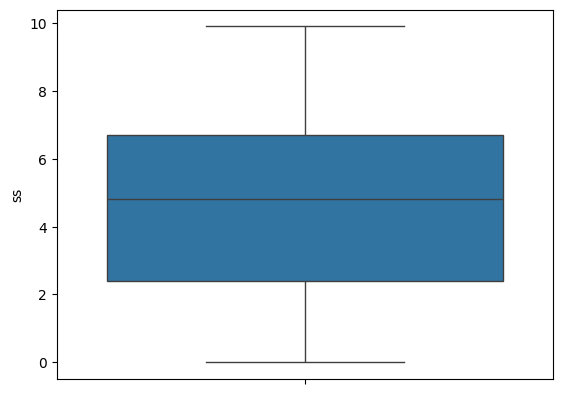

In [35]:
sns.boxplot(y=cuaca_kemayoran_processed['ss'])
plt.show()

Text(0, 0.5, 'count')

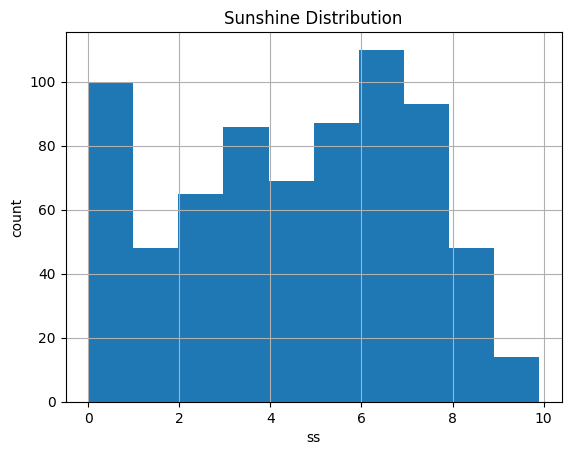

In [36]:
cuaca_kemayoran_processed['ss'].hist()
plt.title('Sunshine Distribution')
plt.xlabel('ss')
plt.ylabel('count')

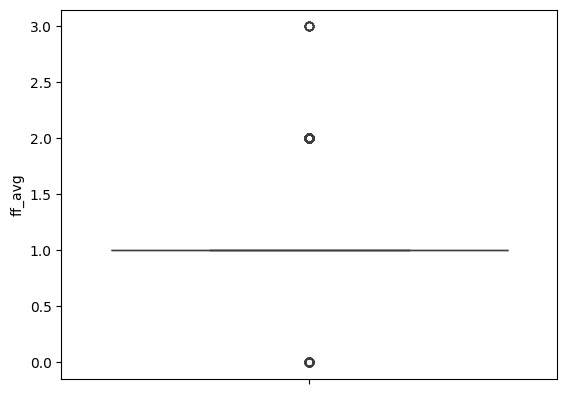

In [37]:
sns.boxplot(y=cuaca_kemayoran_processed['ff_avg'])
plt.show()

Text(0, 0.5, 'count')

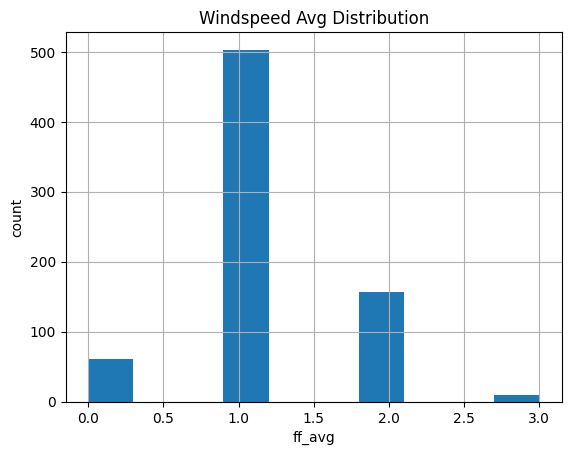

In [38]:
cuaca_kemayoran_processed['ff_avg'].hist()
plt.title('Windspeed Avg Distribution')
plt.xlabel('ff_avg')
plt.ylabel('count')

TRENDS
- tren Tavg semakin naik
- tren RH_avg cenderung semakin turun

DISTRIBUTIONS:
- Tavg & RH_avg mempunyai bentuk distribusi normal yang sedikit right skew

#### EDA Bivariate

In [39]:
list(cuaca_kemayoran_processed[['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']].columns)

['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']

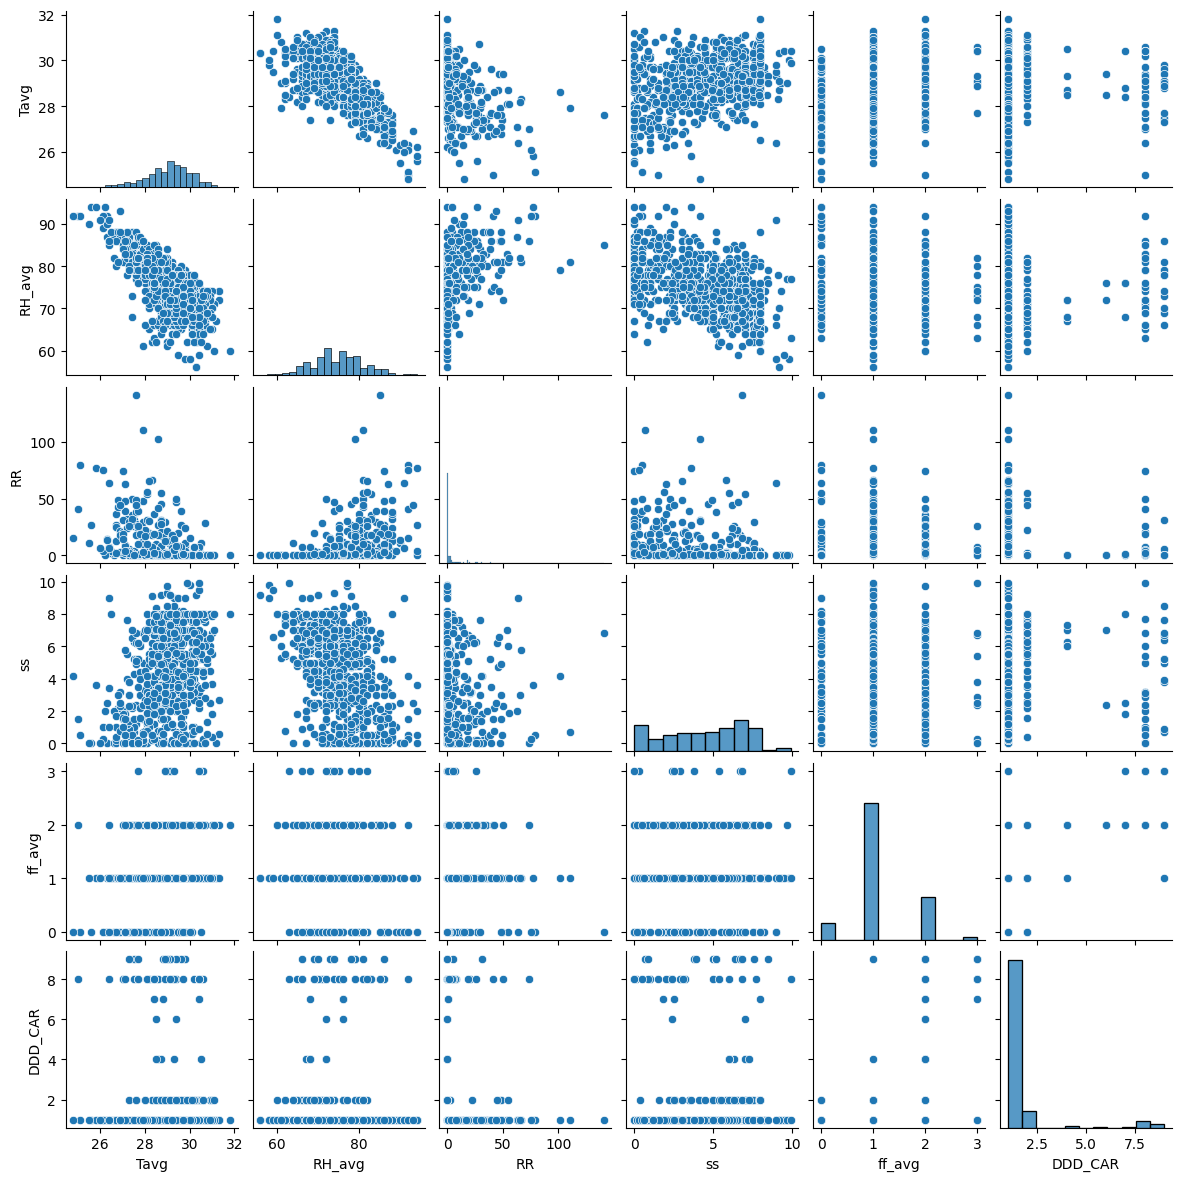

In [40]:
sns.pairplot(cuaca_kemayoran_processed, height=2)

Temperature
- LOWER Temperature - HIGHER Humidity
- LOWER Temperature - cenderung HIGHER Rainfall
- HIGHER Temperature - cendurung HIGHER Sunshine

Humidity
- HIGHER Humidity - cenderung HIGHER Rainfall
- HIGHER Humidity - cenderung LOWER sunshine

Else is hard to see the correlation

#### Impute Data

In [41]:
cuaca_kemayoran_processed

Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
Tanggal                                             
2023-01-01  26.3    87.0  14.5  0.0     1.0      1.0
2023-01-02  27.5    81.0  31.5  0.7     2.0      9.0
2023-01-03  26.6    82.0   0.5  0.0     1.0      1.0
2023-01-04  26.4    86.0   2.4  NaN     1.0      1.0
2023-01-05  27.4    83.0  35.3  NaN     2.0      1.0
...          ...     ...   ...  ...     ...      ...
2024-12-27  29.2    78.0   NaN  1.2     2.0      1.0
2024-12-28  30.0    70.0   NaN  3.8     2.0      1.0
2024-12-29  29.7    73.0   NaN  3.0     1.0      1.0
2024-12-30  28.4    76.0   1.0  1.8     2.0      7.0
2024-12-31  28.4    76.0   2.0  2.4     2.0      8.0

[731 rows x 6 columns]

In [42]:
imputer = KNNImputer()
imputed_cuaca_kemayoran = pd.concat(
  [
    pd.DataFrame({'Tanggal': cuaca_kemayoran_processed.index}),
    pd.DataFrame(imputer.fit_transform(cuaca_kemayoran_processed),columns = ['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR'])
  ], axis=1
)
imputed_cuaca_kemayoran[['Tavg', 'RR', 'ss']] = imputed_cuaca_kemayoran[['Tavg', 'RR', 'ss']].round(1)
imputed_cuaca_kemayoran[['RH_avg', 'DDD_CAR', 'ff_avg']] = imputed_cuaca_kemayoran[['RH_avg', 'DDD_CAR', 'ff_avg']].round(0)
imputed_cuaca_kemayoran.set_index('Tanggal', inplace=True)

In [43]:
startdate = pd.to_datetime('2023-10-21').date()
enddate = pd.to_datetime('2023-10-25').date()
imputed_cuaca_kemayoran.loc[startdate:enddate]

Tavg  RH_avg   RR   ss  ff_avg  DDD_CAR
Tanggal                                            
2023-10-21  30.2    71.0  0.0  7.2     1.0      1.0
2023-10-22  30.4    65.0  0.0  8.0     1.0      1.0
2023-10-23  29.0    75.0  7.1  4.4     1.0      2.0
2023-10-24  29.4    72.0  0.0  8.0     1.0      1.0
2023-10-25  29.5    72.0  0.4  2.0     1.0      1.0

In [44]:
date_temp = pd.to_datetime('2023-10-23').date()
columns_temp = ['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg', 'DDD_CAR']
imputed_cuaca_kemayoran.loc[date_temp, columns_temp] = np.nan
imputed_cuaca_kemayoran[columns_temp] = imputed_cuaca_kemayoran[columns_temp].interpolate(method ='linear', limit_direction ='forward')

In [45]:
startdate = pd.to_datetime('2023-10-21').date()
enddate = pd.to_datetime('2023-10-25').date()
imputed_cuaca_kemayoran.loc[startdate:enddate]

Tavg  RH_avg   RR   ss  ff_avg  DDD_CAR
Tanggal                                            
2023-10-21  30.2    71.0  0.0  7.2     1.0      1.0
2023-10-22  30.4    65.0  0.0  8.0     1.0      1.0
2023-10-23  29.9    68.5  0.0  8.0     1.0      1.0
2023-10-24  29.4    72.0  0.0  8.0     1.0      1.0
2023-10-25  29.5    72.0  0.4  2.0     1.0      1.0

#### EDA After Cleaning & Preprocess

In [46]:
imputed_cuaca_kemayoran.describe()

Tavg      RH_avg          RR          ss      ff_avg     DDD_CAR
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000
mean    29.010807   74.954172    6.537483    4.451984    1.157319    1.525308
std      1.089215    6.504131   14.366142    2.590828    0.572077    1.704258
min     24.800000   56.000000    0.000000    0.000000    0.000000    1.000000
25%     28.400000   71.000000    0.000000    2.400000    1.000000    1.000000
50%     29.100000   75.000000    0.200000    4.800000    1.000000    1.000000
75%     29.700000   79.000000    5.650000    6.700000    1.000000    1.000000
max     31.800000   94.000000  140.900000    9.900000    3.000000    9.000000

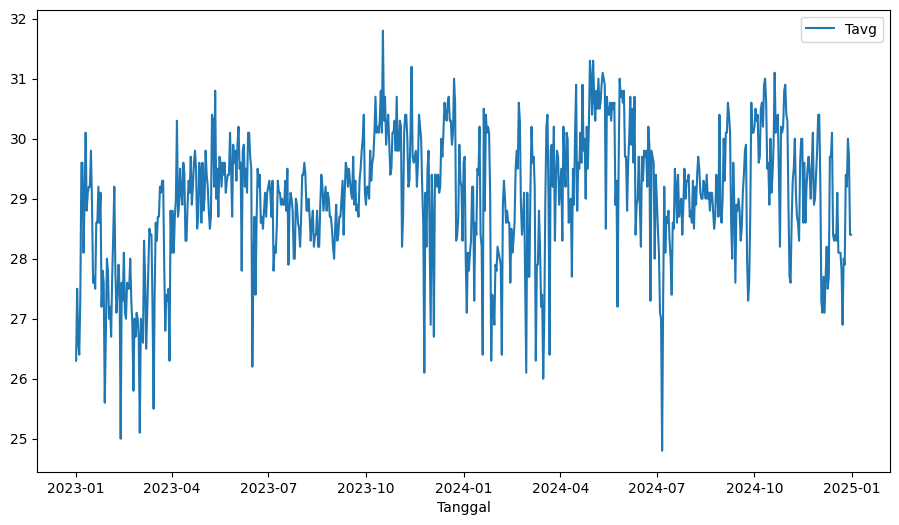

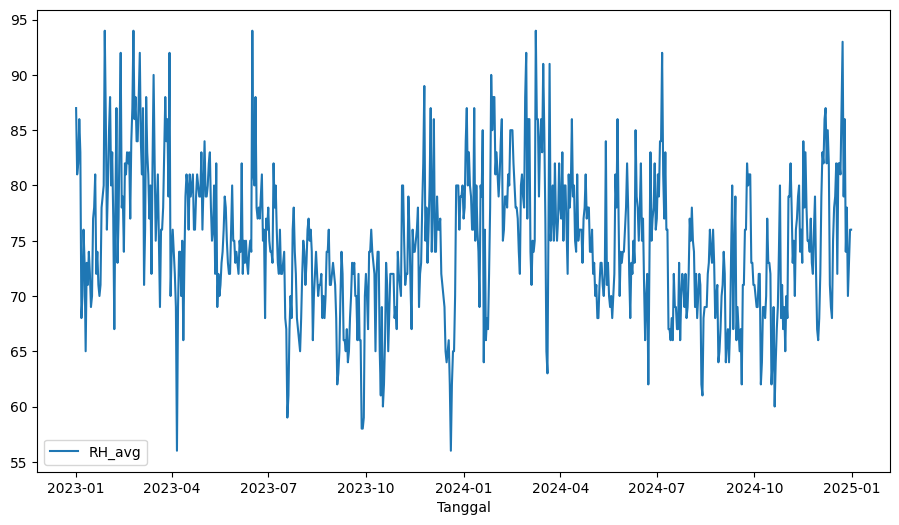

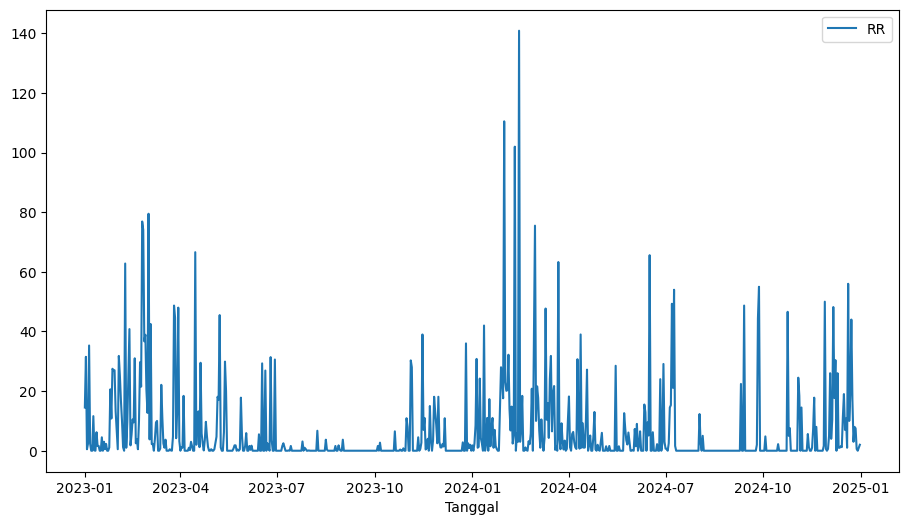

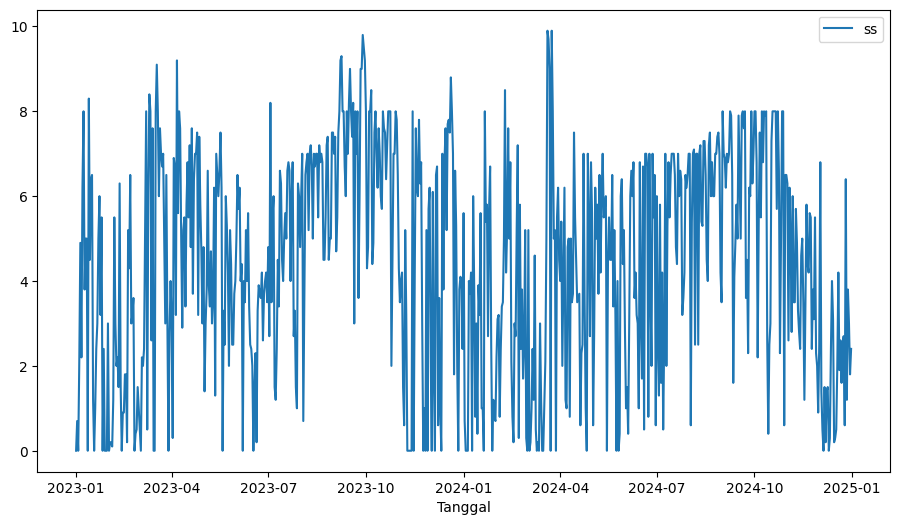

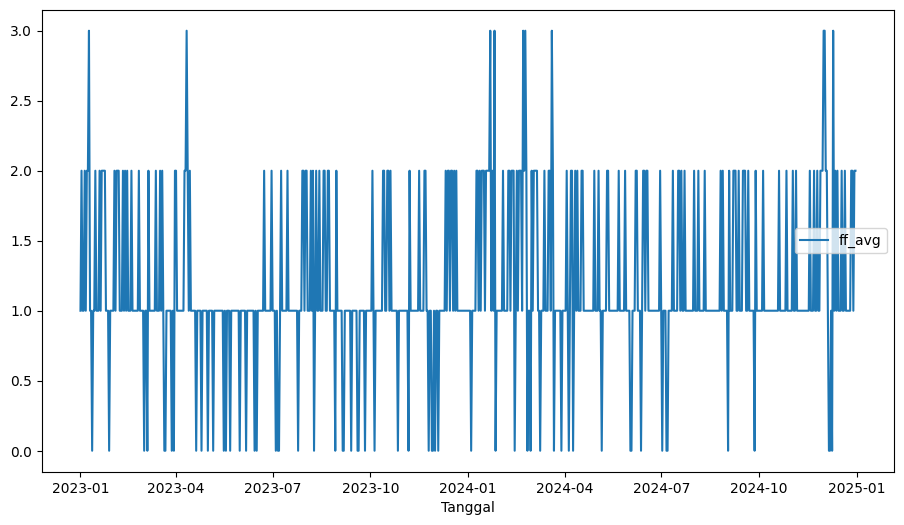

In [47]:
imputed_cuaca_kemayoran.plot(y='Tavg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=25, ymax=32, colors='red')

imputed_cuaca_kemayoran.plot(y='RH_avg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=55, ymax=95, colors='red')

imputed_cuaca_kemayoran.plot(y='RR', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=200, colors='red')

imputed_cuaca_kemayoran.plot(y='ss', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=10, colors='red')

imputed_cuaca_kemayoran.plot(y='ff_avg', figsize=(11,6))
# plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=5, colors='red')
plt.show()

In [48]:
# label_to_category = {
#     1: 'C',
#     2: 'N',   
#     3: 'NE',  
#     4: 'E',  
#     5: 'SE', 
#     6: 'S', 
#     7: 'SW', 
#     8: 'W', 
#     9: 'NW'  
# }
# imputed_cuaca_kemayoran['DDD_CAR_category'] = imputed_cuaca_kemayoran['DDD_CAR'].map(label_to_category)

In [49]:
imputed_cuaca_kemayoran

Tavg  RH_avg    RR   ss  ff_avg  DDD_CAR
Tanggal                                             
2023-01-01  26.3    87.0  14.5  0.0     1.0      1.0
2023-01-02  27.5    81.0  31.5  0.7     2.0      9.0
2023-01-03  26.6    82.0   0.5  0.0     1.0      1.0
2023-01-04  26.4    86.0   2.4  2.1     1.0      1.0
2023-01-05  27.4    83.0  35.3  4.9     2.0      1.0
...          ...     ...   ...  ...     ...      ...
2024-12-27  29.2    78.0   7.5  1.2     2.0      1.0
2024-12-28  30.0    70.0   0.6  3.8     2.0      1.0
2024-12-29  29.7    73.0   0.0  3.0     1.0      1.0
2024-12-30  28.4    76.0   1.0  1.8     2.0      7.0
2024-12-31  28.4    76.0   2.0  2.4     2.0      8.0

[731 rows x 6 columns]

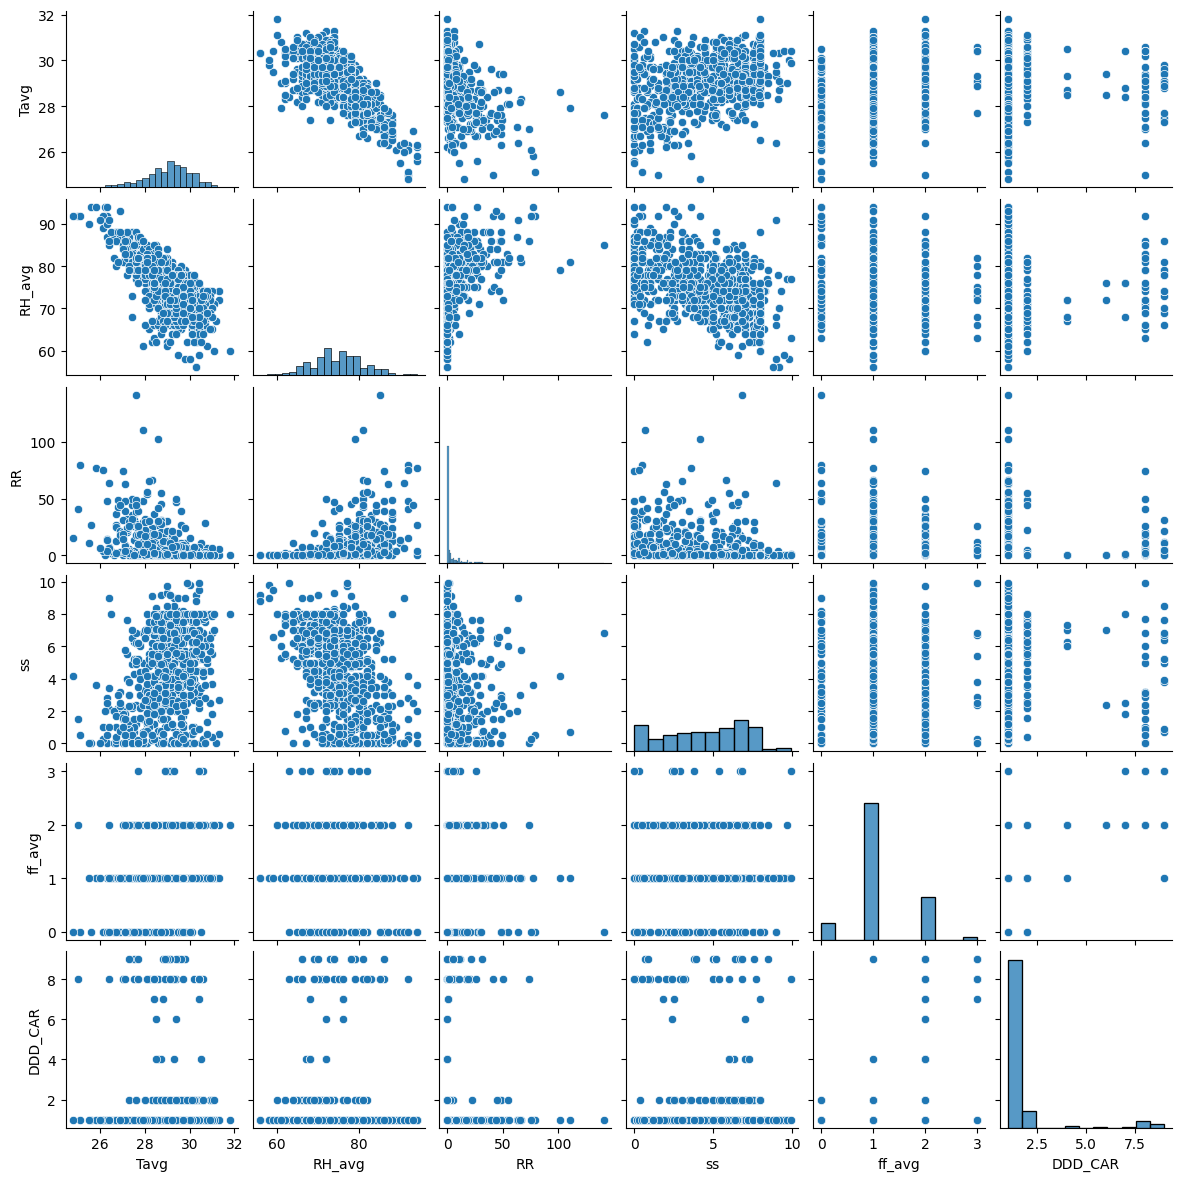

In [50]:
sns.pairplot(imputed_cuaca_kemayoran, height=2)

Rainfall menjadi kolom dengan jumlah imputasi paling banyak (300) data, namun tetap tidak terlihat perubahan yang berarti

### Summary EDA Data Cuaca

**TRENDS**

*Kemayoran*:
- Tavg
    - memiliki trend menaik dari awal ke akhir 2023, lalu 2024 tidak ada tren
    - secara keseluruhan terdapat musiman sekitar 5-6 bulan sekali dari 2023-2024
- RH_avg
    - tidak ada trend
    - terdapat musiman yang terjadi sekitar 1 tahun sekali. RH akan tinggi pada awal dan akhir tahun, lalu menurun pada pertengahan tahun
- RR
    - tidak ada trend
    - seasonality: curah hujan yang menaik saat menjelang akhir tahun dan baru menurun saat menjelang pertengahan tahun

    -> ini mengikuti pola musim hujan dan kemarau tahunan indonesia
- SS
    - tidak ada tren
    - sulit untuk melihat seasonality, namun cenderung intensitas matahari lebih tinggi di bulan 10
- ff_avg
    - tidak ada tren
    - rata-rata ff_avg 1-2 m/s

*Tanjung Priok*:
- Tavg semakin naik
- RH_avg no trend

**DISTRIBUTIONS**

*Kemayoran*:
- Tavg: mempunyai bentuk distribusi normal yang right skew
- RH_avg mempunyai bentuk distribusi normal yang hampir sempurna
- RR: sangat left skew, artinya curah hujan lebih sering rendah
- ss: tidak dapat ditentukan
- ff_avg: dominan dengan kecepatan 1

*Tanjung Priok*:
- Tavg menyerupai normal distribution namun lebih right skew dari Kemayoran
- RH_avg hampir menyerupai normal distribution
- sunshine lebih memiliki bentuk namun tetap tidak menyerupai normal distribution

**CORRELATIONS**

*Kemayoran*
1. Temperature
    - HIGHER Humidity - LOWER Temperature
    - HIGHER Rainfall - cenderung LOWER Temperature
    - HIGHER Sunshine - cendurung HIGHER Temperature
2. Humidity
    - HIGHER Rainfall - cenderung HIGHER Humidity
    - LOWER sunshine - cenderung HIGHER Humidity

*Tanjung Priok*
1. Temperature
    - LOWER Temperature - HIGHER Humidity
    - no trend in Temperature & Rainfall
    - no trend in Temperature & Sunshine
2. Humidity
    - HIGHER Humidity - cenderung HIGHER Rainfall
    - ada sedikir kecenderungan LOWER RH_avg membuat HIGHER Sunshine


**Missing Value Summary (Kemayoran & Tanjung Priok)**

**Kemayoran**
- total row: 1440
- rows contain null: 434
- 30.14% data null

List of Missing Values:
  - Tavg: 8888, blank
  - RH_avg: blank
  - RR: 8888, blank
  - ss: blank
  - ff_avg: blank
  - ddd_car: blank

**Tanjung Priok**
- total row: 1440
- rows contain null: 305
- 21.18% data null

List of Missing Values:
- Tavg: blank
- RH_avg: blank
- RR: 8888, blank
- ss: blank
- ff_avg: blank
- ddd_car: blank 

After Cleaning & Preprocessing

Tanjung Priok: Rainfall menjadi kolom dengan jumlah imputasi paling banyak (300) data, namun tetap tidak terlihat perubahan yang berarti

## Data Polutan

### Melihat Data Mentah

In [51]:
polutan_2023.head()

periode_data     tanggal stasiun pm_sepuluh pm_duakomalima sulfur_dioksida  \
0        202301  01/01/2023    DKI1         44             55              47   
1        202301  01/01/2023    DKI2         44             61              56   
2        202301  01/01/2023    DKI3         26             43              51   
3        202301  01/01/2023    DKI4         23             57               -   
4        202301  01/01/2023    DKI5         30              -              21   

  karbon_monoksida ozon nitrogen_dioksida max critical kategori  
0               10   24                 9  55     PM25   SEDANG  
1               16   20                19  61     PM25   SEDANG  
2                5   16                 2  51      SO2   SEDANG  
3                -    -                 -  57     PM25   SEDANG  
4               13   14                 1  52     PM10   SEDANG

In [52]:
polutan_2024.head()

periode_data  bulan  tanggal stasiun  pm_sepuluh  pm_duakomalima  \
0        202401      1       21    DKI3        51.0            65.0   
1        202401      1       22    DKI3        27.0            34.0   
2        202401      1       23    DKI3         NaN            52.0   
3        202401      1       24    DKI3        46.0            65.0   
4        202401      1       25    DKI3        37.0            55.0   

   sulfur_dioksida  karbon_monoksida  ozon  nitrogen_dioksida   max critical  \
0             45.0               9.0   8.0               79.0  79.0      NaN   
1             45.0               5.0   8.0               56.0  56.0      NaN   
2             46.0               6.0   9.0               51.0  52.0     PM25   
3             46.0               8.0   9.0               38.0  65.0     PM25   
4             47.0               7.0  11.0               28.0  55.0     PM25   

  kategori  
0   SEDANG  
1   SEDANG  
2   SEDANG  
3   SEDANG  
4   SEDANG

In [53]:
polutan_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   periode_data       1825 non-null   int64 
 1   tanggal            1825 non-null   object
 2   stasiun            1825 non-null   object
 3   pm_sepuluh         1825 non-null   object
 4   pm_duakomalima     1825 non-null   object
 5   sulfur_dioksida    1825 non-null   object
 6   karbon_monoksida   1825 non-null   object
 7   ozon               1825 non-null   object
 8   nitrogen_dioksida  1825 non-null   object
 9   max                1825 non-null   object
 10  critical           1812 non-null   object
 11  kategori           1825 non-null   object
dtypes: int64(1), object(11)
memory usage: 171.2+ KB


In [54]:
polutan_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   periode_data       1830 non-null   int64  
 1   bulan              1830 non-null   int64  
 2   tanggal            1830 non-null   int64  
 3   stasiun            1830 non-null   object 
 4   pm_sepuluh         1718 non-null   float64
 5   pm_duakomalima     1810 non-null   float64
 6   sulfur_dioksida    1821 non-null   float64
 7   karbon_monoksida   1818 non-null   float64
 8   ozon               1821 non-null   float64
 9   nitrogen_dioksida  1804 non-null   float64
 10  max                1825 non-null   float64
 11  critical           1784 non-null   object 
 12  kategori           1830 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 186.0+ KB


### Penyamaan Kolom

#### Polutan tahun 2023

In [55]:
polutan_2023 = polutan_2023.rename(columns={
  'pm_sepuluh': 'pm10',
  'pm_duakomalima': 'pm25',
  'sulfur_dioksida': 'so2',
  'karbon_monoksida': 'co',
  'ozon': 'o3',
  'nitrogen_dioksida': 'no2'
})

In [56]:
polutan_2023.head()

periode_data     tanggal stasiun pm10 pm25 so2  co  o3 no2 max critical  \
0        202301  01/01/2023    DKI1   44   55  47  10  24   9  55     PM25   
1        202301  01/01/2023    DKI2   44   61  56  16  20  19  61     PM25   
2        202301  01/01/2023    DKI3   26   43  51   5  16   2  51      SO2   
3        202301  01/01/2023    DKI4   23   57   -   -   -   -  57     PM25   
4        202301  01/01/2023    DKI5   30    -  21  13  14   1  52     PM10   

  kategori  
0   SEDANG  
1   SEDANG  
2   SEDANG  
3   SEDANG  
4   SEDANG

In [57]:
polutan_2024.head()

periode_data  bulan  tanggal stasiun  pm_sepuluh  pm_duakomalima  \
0        202401      1       21    DKI3        51.0            65.0   
1        202401      1       22    DKI3        27.0            34.0   
2        202401      1       23    DKI3         NaN            52.0   
3        202401      1       24    DKI3        46.0            65.0   
4        202401      1       25    DKI3        37.0            55.0   

   sulfur_dioksida  karbon_monoksida  ozon  nitrogen_dioksida   max critical  \
0             45.0               9.0   8.0               79.0  79.0      NaN   
1             45.0               5.0   8.0               56.0  56.0      NaN   
2             46.0               6.0   9.0               51.0  52.0     PM25   
3             46.0               8.0   9.0               38.0  65.0     PM25   
4             47.0               7.0  11.0               28.0  55.0     PM25   

  kategori  
0   SEDANG  
1   SEDANG  
2   SEDANG  
3   SEDANG  
4   SEDANG

#### Polutan tahun 2024

In [58]:
polutan_2024 = polutan_2024.rename(columns={
  'pm_sepuluh': 'pm10',
  'pm_duakomalima': 'pm25',
  'sulfur_dioksida': 'so2',
  'karbon_monoksida': 'co',
  'ozon': 'o3',
  'nitrogen_dioksida': 'no2'
})

In [59]:
polutan_2024['tanggal_2'] = polutan_2024['tanggal'].astype('str') + '/' + polutan_2024['bulan'].astype('str') + '/' + '2024'
polutan_2024.insert(1, 'tanggal_3', polutan_2024['tanggal_2'])
polutan_2024.pop('bulan')
polutan_2024.pop('tanggal')
polutan_2024.pop('tanggal_2')
polutan_2024 = polutan_2024.rename(columns=({'tanggal_3': 'tanggal'}))

In [60]:
polutan_2024.head()

periode_data    tanggal stasiun  pm10  pm25   so2   co    o3   no2   max  \
0        202401  21/1/2024    DKI3  51.0  65.0  45.0  9.0   8.0  79.0  79.0   
1        202401  22/1/2024    DKI3  27.0  34.0  45.0  5.0   8.0  56.0  56.0   
2        202401  23/1/2024    DKI3   NaN  52.0  46.0  6.0   9.0  51.0  52.0   
3        202401  24/1/2024    DKI3  46.0  65.0  46.0  8.0   9.0  38.0  65.0   
4        202401  25/1/2024    DKI3  37.0  55.0  47.0  7.0  11.0  28.0  55.0   

  critical kategori  
0      NaN   SEDANG  
1      NaN   SEDANG  
2     PM25   SEDANG  
3     PM25   SEDANG  
4     PM25   SEDANG

### Penggabungan Data 2023-2024

In [61]:
merge_polutan = pd.concat([polutan_2023, polutan_2024], ignore_index=True,axis=0)
merge_polutan

periode_data     tanggal stasiun pm10  pm25   so2   co    o3   no2  \
0           202301  01/01/2023    DKI1   44    55    47   10    24     9   
1           202301  01/01/2023    DKI2   44    61    56   16    20    19   
2           202301  01/01/2023    DKI3   26    43    51    5    16     2   
3           202301  01/01/2023    DKI4   23    57     -    -     -     -   
4           202301  01/01/2023    DKI5   30     -    21   13    14     1   
...            ...         ...     ...  ...   ...   ...  ...   ...   ...   
3650        202412  27/12/2024    DKI5  NaN  55.0  27.0  9.0  30.0  12.0   
3651        202412  28/12/2024    DKI5  NaN  40.0  26.0  6.0  30.0  12.0   
3652        202412  29/12/2024    DKI5  NaN  51.0  32.0  8.0  28.0  11.0   
3653        202412  30/12/2024    DKI5  NaN  34.0   9.0  5.0  38.0   8.0   
3654        202412  31/12/2024    DKI5  NaN  26.0   9.0  3.0  26.0   3.0   

       max critical kategori  
0       55     PM25   SEDANG  
1       61     PM25   SEDANG  
2       51      SO2   SEDANG  
3       57     PM25   SEDANG  
4       52     PM10   SEDANG  
...    ...      ...      ...  
3650  55.0     PM25   SEDANG  
3651  40.0     PM25     BAIK  
3652  51.0     PM25   SEDANG  
3653  38.0       O3     BAIK  
3654  26.0     PM25     BAIK  

[3655 rows x 12 columns]

In [62]:
merge_polutan.pop('periode_data')
merge_polutan.pop('max')
merge_polutan.pop('critical')
merge_polutan.pop('kategori')

0       SEDANG
1       SEDANG
2       SEDANG
3       SEDANG
4       SEDANG
         ...  
3650    SEDANG
3651      BAIK
3652    SEDANG
3653      BAIK
3654      BAIK
Name: kategori, Length: 3655, dtype: object

In [63]:
merge_polutan.head()

tanggal stasiun pm10 pm25 so2  co  o3 no2
0  01/01/2023    DKI1   44   55  47  10  24   9
1  01/01/2023    DKI2   44   61  56  16  20  19
2  01/01/2023    DKI3   26   43  51   5  16   2
3  01/01/2023    DKI4   23   57   -   -   -   -
4  01/01/2023    DKI5   30    -  21  13  14   1

In [64]:
merge_polutan = merge_polutan[merge_polutan['stasiun'] == 'DKI1']
merge_polutan.reset_index(drop=True, inplace=True)

tanggal stasiun  pm10  pm25   so2    co    o3   no2
0    01/01/2023    DKI1    44    55    47    10    24     9
1    02/01/2023    DKI1    32    43    52     9    24     8
2    03/01/2023    DKI1    31    35    49     9    12     7
3    04/01/2023    DKI1    30    47    53    11    15     9
4    05/01/2023    DKI1    38    50    50    13    26    11
..          ...     ...   ...   ...   ...   ...   ...   ...
726  27/10/2024    DKI1  54.0  78.0  19.0  23.0  34.0  31.0
727  28/10/2024    DKI1  60.0  83.0  10.0  26.0  37.0  36.0
728  29/10/2024    DKI1  59.0  75.0  11.0  28.0  29.0  41.0
729  30/10/2024    DKI1  62.0  86.0  11.0  27.0  36.0  44.0
730  31/10/2024    DKI1  59.0  78.0  11.0  28.0  29.0  45.0

[731 rows x 8 columns]

### Data Understanding

- Check data after merged
- find the Non-NaN empty values
- formatting data

In [65]:
merge_polutan

tanggal stasiun  pm10  pm25   so2    co    o3   no2
0    01/01/2023    DKI1    44    55    47    10    24     9
1    02/01/2023    DKI1    32    43    52     9    24     8
2    03/01/2023    DKI1    31    35    49     9    12     7
3    04/01/2023    DKI1    30    47    53    11    15     9
4    05/01/2023    DKI1    38    50    50    13    26    11
..          ...     ...   ...   ...   ...   ...   ...   ...
726  27/10/2024    DKI1  54.0  78.0  19.0  23.0  34.0  31.0
727  28/10/2024    DKI1  60.0  83.0  10.0  26.0  37.0  36.0
728  29/10/2024    DKI1  59.0  75.0  11.0  28.0  29.0  41.0
729  30/10/2024    DKI1  62.0  86.0  11.0  27.0  36.0  44.0
730  31/10/2024    DKI1  59.0  78.0  11.0  28.0  29.0  45.0

[731 rows x 8 columns]

In [66]:
merge_polutan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  731 non-null    object
 1   stasiun  731 non-null    object
 2   pm10     731 non-null    object
 3   pm25     728 non-null    object
 4   so2      730 non-null    object
 5   co       727 non-null    object
 6   o3       730 non-null    object
 7   no2      731 non-null    object
dtypes: object(8)
memory usage: 45.8+ KB


In [67]:
merge_polutan.describe()

tanggal stasiun pm10 pm25    so2   co   o3  no2
count          731     731  731  728  730.0  727  730  731
unique         731       1  113  166   60.0   54   79   92
top     31/10/2024    DKI1   58   89   13.0   11   21   29
freq             1     731   22   13   48.0   76   28   25

In [68]:
print("Tipe data tanggal sebelum diolah:", type(merge_polutan['tanggal'][0]))
merge_polutan['tanggal'] = pd.to_datetime(merge_polutan['tanggal'], format = '%d/%m/%Y')
print("Tipe data tanggal setelah diolah:", type(merge_polutan['tanggal'][0]))

merge_polutan = merge_polutan.set_index('tanggal')
merge_polutan = merge_polutan.sort_index()
merge_polutan.pop('stasiun')
merge_polutan.head()

Tipe data tanggal sebelum diolah: <class 'str'>
Tipe data tanggal setelah diolah: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\stevanus.febrian\AppData\Local\Temp\ipykernel_29988\2119723685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_polutan['tanggal'] = pd.to_datetime(merge_polutan['tanggal'], format = '%d/%m/%Y')


pm10 pm25 so2  co  o3 no2
tanggal                             
2023-01-01   44   55  47  10  24   9
2023-01-02   32   43  52   9  24   8
2023-01-03   31   35  49   9  12   7
2023-01-04   30   47  53  11  15   9
2023-01-05   38   50  50  13  26  11

### Menyesuaikan tipe data numeric

In [69]:
for col in ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']:
    merge_polutan[col] = pd.to_numeric(merge_polutan[col], errors='coerce')

merge_polutan.dtypes

pm10    float64
pm25    float64
so2     float64
co      float64
o3      float64
no2     float64
dtype: object

### Check Missing Values Pada Penggabungan Data 2021-2024

1. pm10: '-', '---', blank
2. pm25: '-', '---', blank
3. so2: '-', '---', blank
4. co: '-', '---', blank
5. o3: '-', '---', blank
6. no2: '-', '---', blank


Missing Values Pada Penggabungan Data 2023-2024

1. pm10: '-', blank
2. pm25: '-', blank
3. so2: '-', blank
4. co: '-', '---', blank
5. o3: '-', '---', blank
6. no2: '-', blank


missing values akan diubah ke dalamn NaN

In [70]:
merge_polutan

pm10  pm25   so2    co    o3   no2
tanggal                                       
2023-01-01  44.0  55.0  47.0  10.0  24.0   9.0
2023-01-02  32.0  43.0  52.0   9.0  24.0   8.0
2023-01-03  31.0  35.0  49.0   9.0  12.0   7.0
2023-01-04  30.0  47.0  53.0  11.0  15.0   9.0
2023-01-05  38.0  50.0  50.0  13.0  26.0  11.0
...          ...   ...   ...   ...   ...   ...
2024-10-27  54.0  78.0  19.0  23.0  34.0  31.0
2024-10-28  60.0  83.0  10.0  26.0  37.0  36.0
2024-10-29  59.0  75.0  11.0  28.0  29.0  41.0
2024-10-30  62.0  86.0  11.0  27.0  36.0  44.0
2024-10-31  59.0  78.0  11.0  28.0  29.0  45.0

[731 rows x 6 columns]

### Visualisasi Before Processed missing value

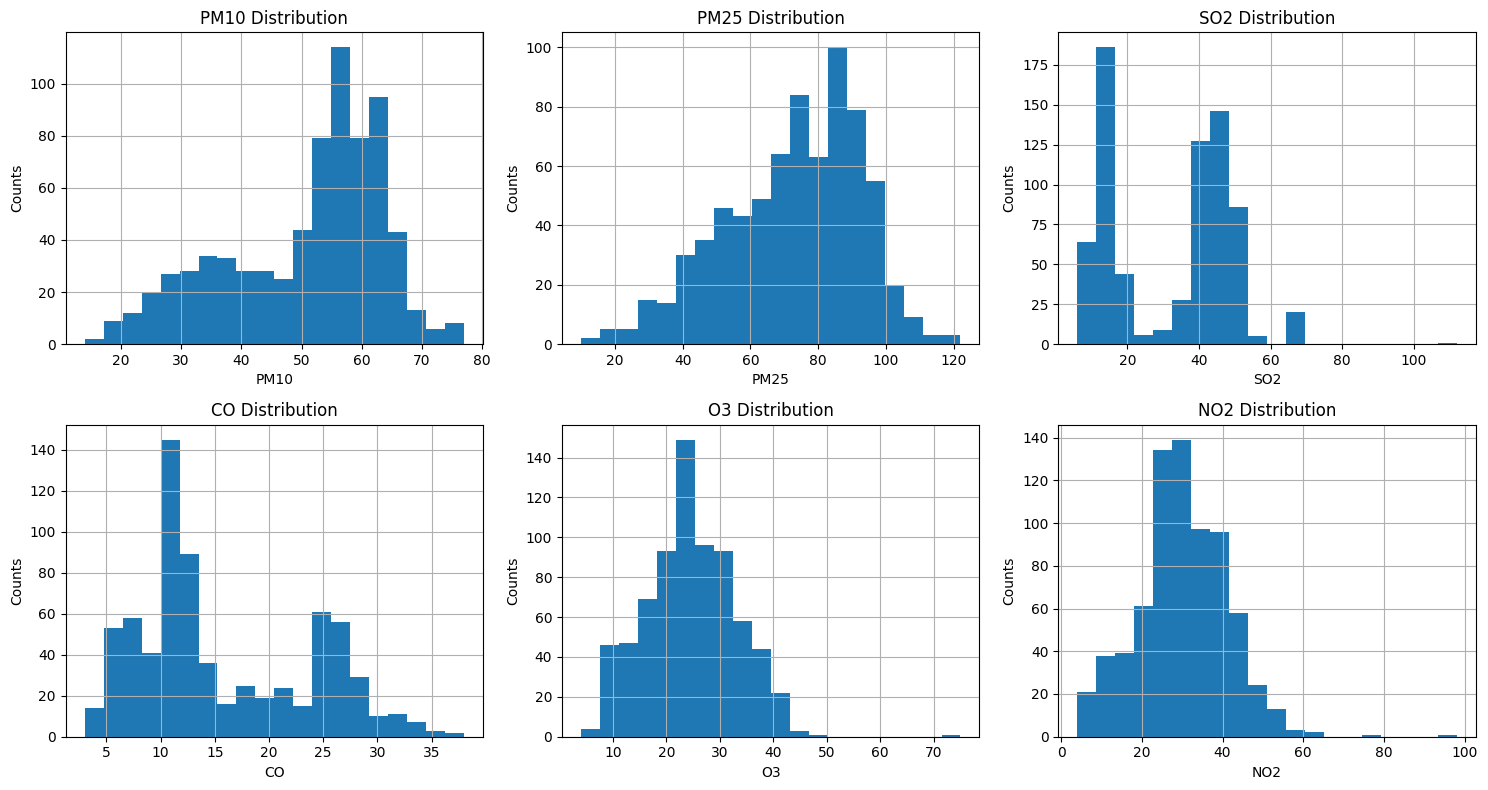

In [71]:
pollutants = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    merge_polutan[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'{col.upper()} Distribution')
    axes[i].set_xlabel(col.upper())
    axes[i].set_ylabel('Counts')

plt.tight_layout()
plt.show()


### Visualisasi outlier

<Axes: xlabel='Pollutant', ylabel='Value'>

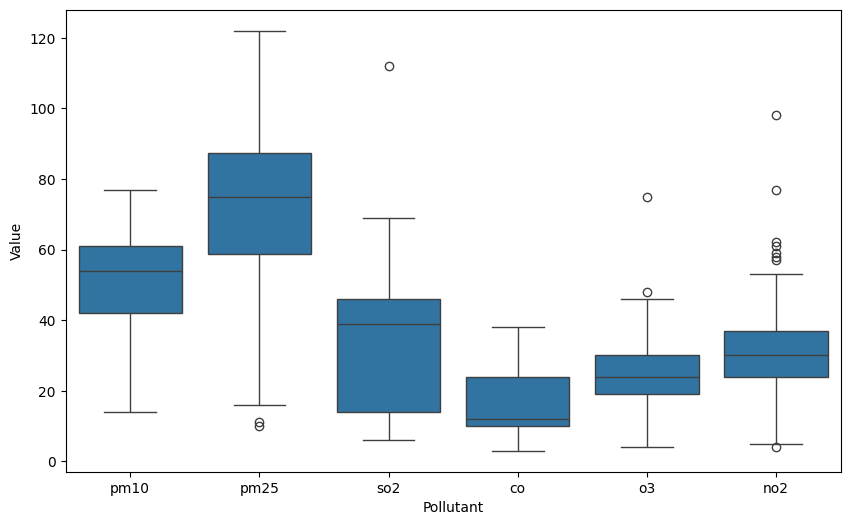

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pollutant', y='Value', data=merge_polutan.melt(value_vars=['pm10', 'pm25', 'so2', 'co', 'o3', 'no2'], var_name='Pollutant', value_name='Value'))

In [73]:
def get_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

pollutants = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']
outlier_data = pd.DataFrame()

for col in pollutants:
    outliers = get_outliers_iqr(merge_polutan, col)
    outliers['outlier'] = col
    outlier_data = pd.concat([outlier_data, outliers])

outlier_data = outlier_data.join(cuaca_kemayoran_processed, how='inner')
outlier_data

C:\Users\stevanus.febrian\AppData\Local\Temp\ipykernel_29988\2606878102.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['outlier'] = col
C:\Users\stevanus.febrian\AppData\Local\Temp\ipykernel_29988\2606878102.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['outlier'] = col
C:\Users\stevanus.febrian\AppData\Local\Temp\ipykernel_29988\2606878102.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

pm10   pm25    so2    co    o3   no2 outlier  Tavg  RH_avg    RR  \
tanggal                                                                        
2024-12-30  35.0   10.0   13.0   5.0  12.0  13.0    pm25  28.4    76.0   1.0   
2024-12-31  29.0   11.0    6.0  13.0  10.0  18.0    pm25  28.4    76.0   2.0   
2024-01-04  30.0    NaN  112.0  20.0   8.0  77.0     so2  27.1    87.0   8.5   
2023-10-31  67.0   95.0   45.0   5.0  48.0  33.0      o3  29.8    74.0   NaN   
2024-11-05  40.0   65.0   12.0  28.0  75.0  45.0      o3  28.6    78.0   0.0   
2023-01-08  28.0   49.0   47.0  11.0   9.0   4.0     no2  28.1    76.0   NaN   
2024-04-02  67.0   97.0   14.0  28.0  28.0  62.0     no2  29.5    77.0   1.2   
2024-04-05  67.0  102.0   13.0  34.0  26.0  58.0     no2  29.6    80.0   NaN   
2024-01-04  30.0    NaN  112.0  20.0   8.0  77.0     no2  27.1    87.0   8.5   
2024-12-07  66.0  103.0   69.0  27.0  12.0  98.0     no2  27.7    87.0   NaN   
2024-12-08  38.0   67.0   68.0  15.0  18.0  57.0     no2  28.2    82.0  30.4   
2024-12-10  38.0   56.0   68.0  12.0   7.0  61.0     no2  27.7    82.0  26.0   
2024-12-18  50.0   67.0   69.0   8.0   8.0  59.0     no2  29.1    72.0   NaN   

             ss  ff_avg  DDD_CAR  
tanggal                           
2024-12-30  1.8     2.0      7.0  
2024-12-31  2.4     2.0      8.0  
2024-01-04  0.0     0.0      1.0  
2023-10-31  6.5     1.0      1.0  
2024-11-05  2.8     2.0      1.0  
2023-01-08  8.0     2.0      1.0  
2024-04-02  5.4     1.0      1.0  
2024-04-05  6.2     0.0      1.0  
2024-01-04  0.0     0.0      1.0  
2024-12-07  0.2     0.0      1.0  
2024-12-08  1.4     1.0      1.0  
2024-12-10  0.0     3.0      8.0  
2024-12-18  2.0     2.0      8.0

In [74]:
outlier_data


pm10   pm25    so2    co    o3   no2 outlier  Tavg  RH_avg    RR  \
tanggal                                                                        
2024-12-30  35.0   10.0   13.0   5.0  12.0  13.0    pm25  28.4    76.0   1.0   
2024-12-31  29.0   11.0    6.0  13.0  10.0  18.0    pm25  28.4    76.0   2.0   
2024-01-04  30.0    NaN  112.0  20.0   8.0  77.0     so2  27.1    87.0   8.5   
2023-10-31  67.0   95.0   45.0   5.0  48.0  33.0      o3  29.8    74.0   NaN   
2024-11-05  40.0   65.0   12.0  28.0  75.0  45.0      o3  28.6    78.0   0.0   
2023-01-08  28.0   49.0   47.0  11.0   9.0   4.0     no2  28.1    76.0   NaN   
2024-04-02  67.0   97.0   14.0  28.0  28.0  62.0     no2  29.5    77.0   1.2   
2024-04-05  67.0  102.0   13.0  34.0  26.0  58.0     no2  29.6    80.0   NaN   
2024-01-04  30.0    NaN  112.0  20.0   8.0  77.0     no2  27.1    87.0   8.5   
2024-12-07  66.0  103.0   69.0  27.0  12.0  98.0     no2  27.7    87.0   NaN   
2024-12-08  38.0   67.0   68.0  15.0  18.0  57.0     no2  28.2    82.0  30.4   
2024-12-10  38.0   56.0   68.0  12.0   7.0  61.0     no2  27.7    82.0  26.0   
2024-12-18  50.0   67.0   69.0   8.0   8.0  59.0     no2  29.1    72.0   NaN   

             ss  ff_avg  DDD_CAR  
tanggal                           
2024-12-30  1.8     2.0      7.0  
2024-12-31  2.4     2.0      8.0  
2024-01-04  0.0     0.0      1.0  
2023-10-31  6.5     1.0      1.0  
2024-11-05  2.8     2.0      1.0  
2023-01-08  8.0     2.0      1.0  
2024-04-02  5.4     1.0      1.0  
2024-04-05  6.2     0.0      1.0  
2024-01-04  0.0     0.0      1.0  
2024-12-07  0.2     0.0      1.0  
2024-12-08  1.4     1.0      1.0  
2024-12-10  0.0     3.0      8.0  
2024-12-18  2.0     2.0      8.0

In [75]:
outlier_data.index = outlier_data.index.date

In [76]:
cuaca_kemayoran_processed.index

Index([2023-01-01, 2023-01-02, 2023-01-03, 2023-01-04, 2023-01-05, 2023-01-06,
       2023-01-07, 2023-01-08, 2023-01-09, 2023-01-10,
       ...
       2024-12-22, 2024-12-23, 2024-12-24, 2024-12-25, 2024-12-26, 2024-12-27,
       2024-12-28, 2024-12-29, 2024-12-30, 2024-12-31],
      dtype='object', name='Tanggal', length=731)

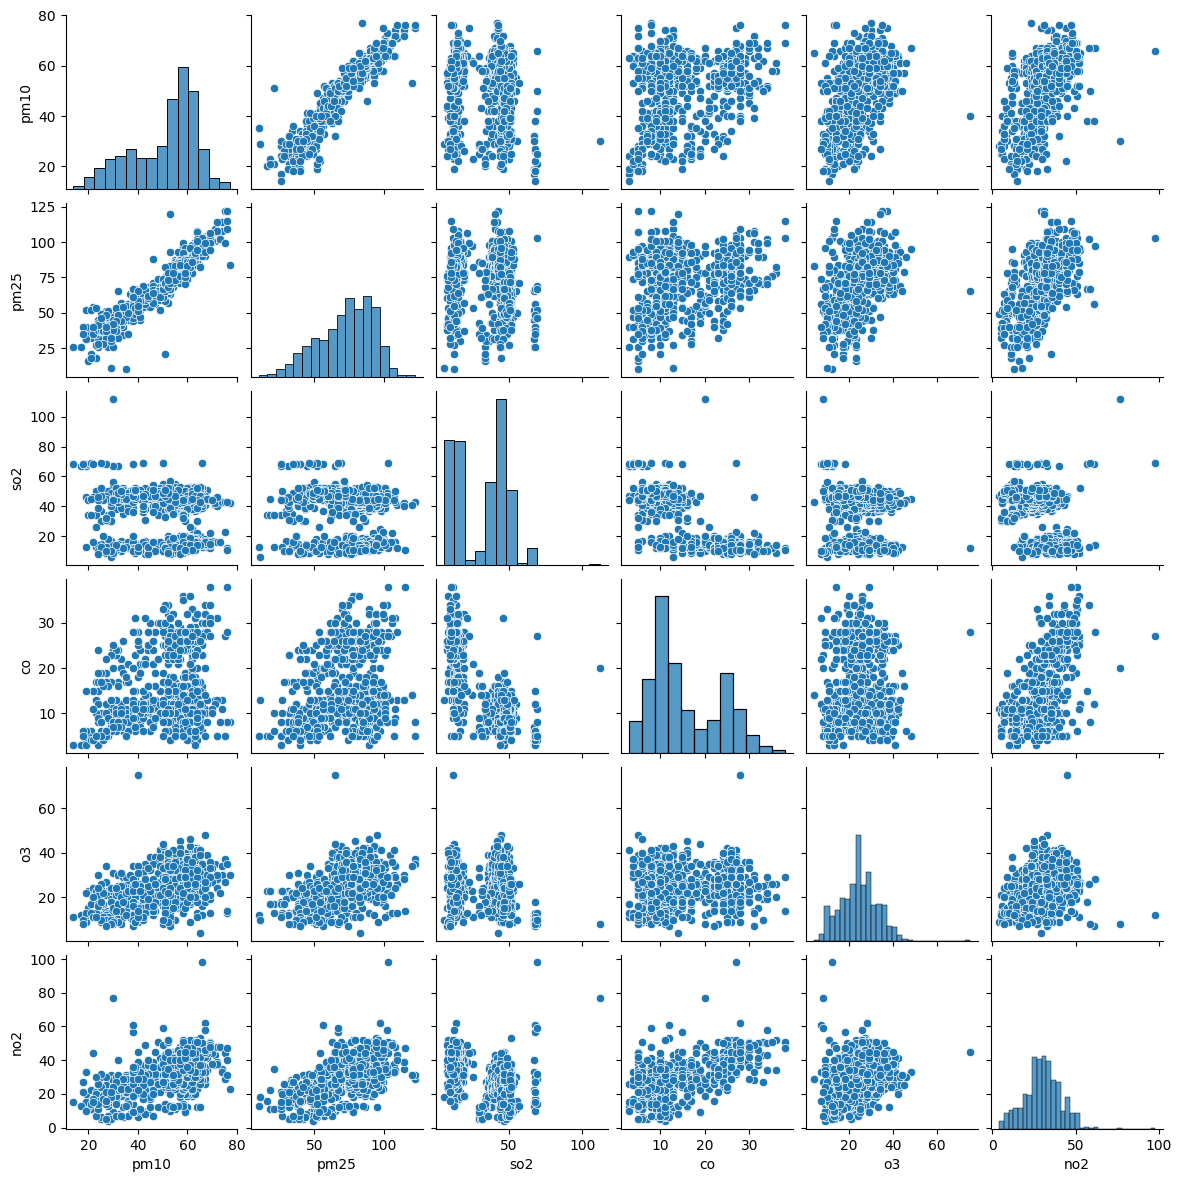

In [77]:
sns.pairplot(merge_polutan, height=2)

### Missing values

In [78]:
merge_polutan[merge_polutan.isnull().any(axis=1)].shape[0]

26

In [79]:
# data yang mengandung null values
null_merge_polutan = merge_polutan[merge_polutan.isnull().any(axis=1)]
null_merge_polutan

pm10   pm25    so2    co    o3   no2
tanggal                                         
2023-01-21  42.0   59.0    NaN   9.0  10.0  20.0
2023-01-22  37.0   46.0    NaN   7.0  11.0  17.0
2023-01-23  21.0   32.0    NaN   6.0  13.0  12.0
2023-01-24  29.0   39.0    NaN   7.0  10.0  20.0
2023-02-23  36.0   47.0   40.0   NaN  23.0  23.0
2023-03-04  31.0   40.0   50.0   NaN  18.0  21.0
2023-03-22   NaN    NaN    NaN   NaN   NaN   NaN
2023-03-23   NaN    NaN    NaN   NaN   NaN   NaN
2023-03-24   NaN    NaN    NaN   NaN   NaN   NaN
2023-09-30   NaN    NaN    NaN   NaN   NaN   NaN
2023-10-14  65.0  102.0   47.0   NaN  24.0  32.0
2023-10-15  62.0   98.0   48.0   NaN  25.0  22.0
2023-10-16  59.0   96.0   50.0   NaN  31.0  24.0
2023-10-17  61.0   93.0   49.0   NaN  43.0  25.0
2023-12-20  65.0   95.0   53.0   NaN  24.0  12.0
2023-12-21  53.0   71.0   57.0   NaN  26.0  13.0
2023-12-22  39.0   59.0   52.0   NaN  15.0   9.0
2024-01-04  30.0    NaN  112.0  20.0   8.0  77.0
2024-01-19  19.0   31.0   46.0   NaN  12.0  20.0
2024-01-20  26.0   28.0   44.0   NaN  17.0  17.0
2024-01-27  21.0   18.0   45.0   NaN  17.0  22.0
2024-01-29  30.0    NaN   44.0   8.0  17.0  28.0
2024-02-15  35.0   55.0    NaN  18.0  22.0  29.0
2024-06-07  58.0   82.0   16.0   NaN  24.0  41.0
2024-11-04  44.0   60.0    8.0  25.0   NaN  37.0
2024-11-27  50.0    NaN   10.0  33.0  10.0  27.0

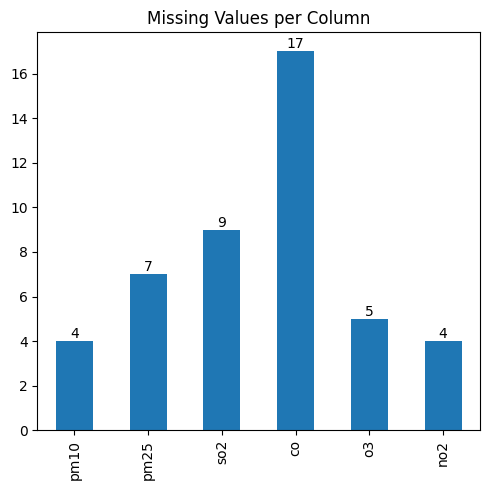

In [80]:
missing_counts = merge_polutan.isnull().sum()

plt.figure(figsize=(5,5))
ax = missing_counts.plot(kind='bar', title='Missing Values per Column')

for i, value in enumerate(missing_counts):
    ax.text(i, value, str(value), ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

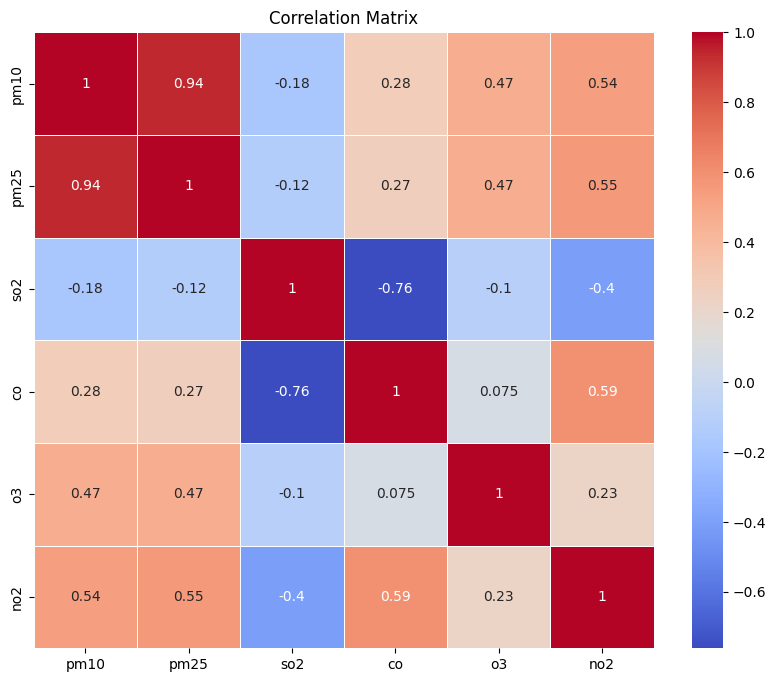

In [81]:
# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(merge_polutan.loc[:, merge_polutan.columns != 'tanggal'].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**2023-2024, Missing Values Percentage: 17,88%**

3350 total rows

599 rows contain nulls

**dibawah ini adalah 2023-2024**

current total data: 5175

total rows with missing data: 906

17.55% baris data contains missing value

42 baris data Missing Completely At Random (MCAR)

**2023-2024, Missing Values Percentage: 18,91%**

3655 total rows

691 rows contain nulls

26 baris data Missing Completely At Random (MCAR)

### Univarite Visualization

#### DKI 1

In [82]:
# polutan_temp = merge_polutan.copy()
# polutan_temp['tanggal'] = pd.to_datetime(polutan_temp['tanggal'])
# polutan_temp = polutan_temp.set_index('tanggal')

# polutan_temp.plot(y='pm10', figsize=(14,6), linewidth=1)
# plt.axhline(y=75, color='black')
# plt.axhline(y=20, color='black')
# # plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=25, ymax=32, colors='red')

# polutan_temp.plot(y='pm25', figsize=(14,6), linewidth=1)
# plt.axhline(y=110, color='black')
# plt.axhline(y=25, color='black')
# # plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=55, ymax=95, colors='red')

# polutan_temp.plot(y='so2', figsize=(14,6), linewidth=1)
# plt.axhline(y=50, color='black')
# plt.axhline(y=10, color='black')
# # plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=200, colors='red')

# polutan_temp.plot(y='co', figsize=(14,6), linewidth=1)
# plt.axhline(y=25, color='black')
# plt.axhline(y=5, color='black')
# # plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=10, colors='red')

# polutan_temp.plot(y='o3', figsize=(14,6), linewidth=1)
# plt.axhline(y=40, color='black')
# plt.axhline(y=10, color='black')
# # plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=5, colors='red')

# polutan_temp.plot(y='no2', figsize=(14,6), linewidth=1)
# plt.axhline(y=45, color='black')
# plt.axhline(y=5, color='black')
# # plt.vlines(x=['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], ymin=0, ymax=5, colors='red')
# plt.show()

Analisis 2021-2024
1. PM10
- semua memiliki seasonality yang sama, namun tidak ada trend

2. PM2.5
- semua memiliki seasonality yang sama, namun tidak ada trend

3. SO2:
- DKI1: memiliki trend yang berbeda tiap tahun

4. CO:
- DKI1

5. O3: setiap stasiun memiliki trend & seasonality yang mirip dengan variasi intensitas O3 pada beberapa Waktu & setiap stasiun

6. NO2:
- DKI1, DKI4, DKI5 memiliki trend naik & turun pada Waktu yang mirip

### Visualization Bivariate

In [83]:
merge_polutan

pm10  pm25   so2    co    o3   no2
tanggal                                       
2023-01-01  44.0  55.0  47.0  10.0  24.0   9.0
2023-01-02  32.0  43.0  52.0   9.0  24.0   8.0
2023-01-03  31.0  35.0  49.0   9.0  12.0   7.0
2023-01-04  30.0  47.0  53.0  11.0  15.0   9.0
2023-01-05  38.0  50.0  50.0  13.0  26.0  11.0
...          ...   ...   ...   ...   ...   ...
2024-10-27  54.0  78.0  19.0  23.0  34.0  31.0
2024-10-28  60.0  83.0  10.0  26.0  37.0  36.0
2024-10-29  59.0  75.0  11.0  28.0  29.0  41.0
2024-10-30  62.0  86.0  11.0  27.0  36.0  44.0
2024-10-31  59.0  78.0  11.0  28.0  29.0  45.0

[731 rows x 6 columns]

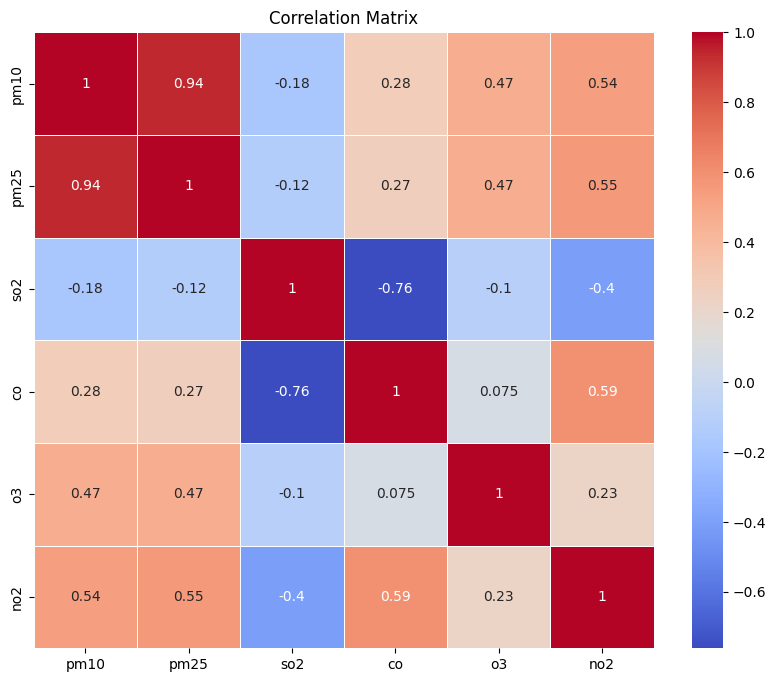

In [84]:
# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(merge_polutan.loc[:, merge_polutan.columns != 'tanggal'].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Cek Missing Value

1. cek berapa banyak baris yang mengandung missing values
2. cek berapa banyak baris yang seluruh datanya kosong
3. melihat berapa banyak baris dimana stasiun tidak memiliki pengukuran
4. melihat stasiun apa yang paling banyak mengandung missing values


#### 1. cek berapa banyak baris yang mengandung missing values

In [85]:
#1. cek berapa banyak baris yang mengandung missing values
merge_polutan[merge_polutan.isna().any(axis=1)]

pm10   pm25    so2    co    o3   no2
tanggal                                         
2023-01-21  42.0   59.0    NaN   9.0  10.0  20.0
2023-01-22  37.0   46.0    NaN   7.0  11.0  17.0
2023-01-23  21.0   32.0    NaN   6.0  13.0  12.0
2023-01-24  29.0   39.0    NaN   7.0  10.0  20.0
2023-02-23  36.0   47.0   40.0   NaN  23.0  23.0
2023-03-04  31.0   40.0   50.0   NaN  18.0  21.0
2023-03-22   NaN    NaN    NaN   NaN   NaN   NaN
2023-03-23   NaN    NaN    NaN   NaN   NaN   NaN
2023-03-24   NaN    NaN    NaN   NaN   NaN   NaN
2023-09-30   NaN    NaN    NaN   NaN   NaN   NaN
2023-10-14  65.0  102.0   47.0   NaN  24.0  32.0
2023-10-15  62.0   98.0   48.0   NaN  25.0  22.0
2023-10-16  59.0   96.0   50.0   NaN  31.0  24.0
2023-10-17  61.0   93.0   49.0   NaN  43.0  25.0
2023-12-20  65.0   95.0   53.0   NaN  24.0  12.0
2023-12-21  53.0   71.0   57.0   NaN  26.0  13.0
2023-12-22  39.0   59.0   52.0   NaN  15.0   9.0
2024-01-04  30.0    NaN  112.0  20.0   8.0  77.0
2024-01-19  19.0   31.0   46.0   NaN  12.0  20.0
2024-01-20  26.0   28.0   44.0   NaN  17.0  17.0
2024-01-27  21.0   18.0   45.0   NaN  17.0  22.0
2024-01-29  30.0    NaN   44.0   8.0  17.0  28.0
2024-02-15  35.0   55.0    NaN  18.0  22.0  29.0
2024-06-07  58.0   82.0   16.0   NaN  24.0  41.0
2024-11-04  44.0   60.0    8.0  25.0   NaN  37.0
2024-11-27  50.0    NaN   10.0  33.0  10.0  27.0

#### 2. cek berapa banyak baris yang seluruh datanya kosong

In [86]:
#2. cek berapa banyak baris yang seluruh datanya kosong
merge_polutan[merge_polutan.isna().all(axis=1)]

pm10  pm25  so2  co  o3  no2
tanggal                                 
2023-03-22   NaN   NaN  NaN NaN NaN  NaN
2023-03-23   NaN   NaN  NaN NaN NaN  NaN
2023-03-24   NaN   NaN  NaN NaN NaN  NaN
2023-09-30   NaN   NaN  NaN NaN NaN  NaN

**2023-2024: 47.01% rows containing missing values**

total rows: 670

contains null: 355


**2021-2024: 51.94% rows containing missing values**

total data: 1035

baris yang mengandung null values: 548  

**Updated on 12 Mar 2025**

**2023-2024: 56.49% rows containing missing values**

total rows: 731

contains null: 413

### Proses Missing Values

1. data polutan akan digabung terlebih dahulu dengan data meteorologi, karena Dinas Lingkungan Hidup menyatakan bahwa data meteorologi mempengaruhi perhitungan ispu
2. setelah itu, missing pada data polutan akan diimpute menggunakan KNNImputer
3. dan juga, untuk baris yang semua datanya kosong, akan digunakan linear interpolation untuk imputasinya

In [87]:
# pd.set_option("display.max_columns", None)

In [88]:
polutan_temp = merge_polutan.copy()

polutan_temp = polutan_temp.reset_index()
polutan_temp['tanggal'] = pd.to_datetime(polutan_temp['tanggal']).dt.date
polutan_temp_index = polutan_temp['tanggal']
polutan_temp = polutan_temp.set_index('tanggal')
data_polutan_meteorologi = polutan_temp.join(imputed_cuaca_kemayoran)
data_polutan_meteorologi

pm10  pm25   so2    co    o3   no2  Tavg  RH_avg    RR   ss  \
tanggal                                                                   
2023-01-01  44.0  55.0  47.0  10.0  24.0   9.0  26.3    87.0  14.5  0.0   
2023-01-02  32.0  43.0  52.0   9.0  24.0   8.0  27.5    81.0  31.5  0.7   
2023-01-03  31.0  35.0  49.0   9.0  12.0   7.0  26.6    82.0   0.5  0.0   
2023-01-04  30.0  47.0  53.0  11.0  15.0   9.0  26.4    86.0   2.4  2.1   
2023-01-05  38.0  50.0  50.0  13.0  26.0  11.0  27.4    83.0  35.3  4.9   
...          ...   ...   ...   ...   ...   ...   ...     ...   ...  ...   
2024-10-27  54.0  78.0  19.0  23.0  34.0  31.0  30.1    71.0   0.0  8.0   
2024-10-28  60.0  83.0  10.0  26.0  37.0  36.0  30.2    67.0   0.0  8.0   
2024-10-29  59.0  75.0  11.0  28.0  29.0  41.0  30.8    69.0   0.0  0.6   
2024-10-30  62.0  86.0  11.0  27.0  36.0  44.0  30.9    65.0   0.0  6.5   
2024-10-31  59.0  78.0  11.0  28.0  29.0  45.0  30.4    70.0   0.0  6.5   

            ff_avg  DDD_CAR  
tanggal                      
2023-01-01     1.0      1.0  
2023-01-02     2.0      9.0  
2023-01-03     1.0      1.0  
2023-01-04     1.0      1.0  
2023-01-05     2.0      1.0  
...            ...      ...  
2024-10-27     2.0      1.0  
2024-10-28     1.0      1.0  
2024-10-29     1.0      1.0  
2024-10-30     1.0      1.0  
2024-10-31     1.0      1.0  

[731 rows x 12 columns]

In [89]:
label_to_category = {
    1:'C', 2:'N', 3:'NE', 4:'E', 5:'SE', 6:'S', 7:'SW', 8:'W', 9:'NW'
}

category_to_degree = {
    'C': None, 'N':0, 'NE':45, 'E':90, 'SE':135, 'S':180, 'SW':225, 'W':270, 'NW':315  
}

cos_vals = []
sin_vals = []

data_polutan_meteorologi['DDD_CAR_category'] = data_polutan_meteorologi['DDD_CAR'].map(label_to_category)

for val in data_polutan_meteorologi['DDD_CAR_category']:
    degree = category_to_degree.get(str(val), None)
    if degree is None: 
        cos_vals.append(0.0)
        sin_vals.append(0.0)
    else:
        rad = np.deg2rad(degree)
        cos_vals.append(np.cos(rad))
        sin_vals.append(np.sin(rad))

data_polutan_meteorologi['DDD_CAR_cos'] = cos_vals
data_polutan_meteorologi['DDD_CAR_sin'] = sin_vals
data_polutan_meteorologi.pop('DDD_CAR')
data_polutan_meteorologi.pop('DDD_CAR_category')
data_polutan_meteorologi.head()

pm10  pm25   so2    co    o3   no2  Tavg  RH_avg    RR   ss  \
tanggal                                                                   
2023-01-01  44.0  55.0  47.0  10.0  24.0   9.0  26.3    87.0  14.5  0.0   
2023-01-02  32.0  43.0  52.0   9.0  24.0   8.0  27.5    81.0  31.5  0.7   
2023-01-03  31.0  35.0  49.0   9.0  12.0   7.0  26.6    82.0   0.5  0.0   
2023-01-04  30.0  47.0  53.0  11.0  15.0   9.0  26.4    86.0   2.4  2.1   
2023-01-05  38.0  50.0  50.0  13.0  26.0  11.0  27.4    83.0  35.3  4.9   

            ff_avg  DDD_CAR_cos  DDD_CAR_sin  
tanggal                                       
2023-01-01     1.0     0.000000     0.000000  
2023-01-02     2.0     0.707107    -0.707107  
2023-01-03     1.0     0.000000     0.000000  
2023-01-04     1.0     0.000000     0.000000  
2023-01-05     2.0     0.000000     0.000000

In [90]:
date_temp4 = pd.to_datetime('2023-03-21').date()
date_temp5 = pd.to_datetime('2023-03-25').date()

date_temp6 = pd.to_datetime('2023-09-29').date()
date_temp7 = pd.to_datetime('2023-10-01').date()

pd.concat([data_polutan_meteorologi.loc[date_temp4:date_temp5], data_polutan_meteorologi.loc[date_temp6:date_temp7]])


pm10   pm25   so2    co    o3   no2  Tavg  RH_avg   RR   ss  \
tanggal                                                                   
2023-03-21  54.0   71.0  47.0  14.0  20.0  45.0  29.2    69.0  0.0  7.6   
2023-03-22   NaN    NaN   NaN   NaN   NaN   NaN  29.1    76.0  0.5  7.0   
2023-03-23   NaN    NaN   NaN   NaN   NaN   NaN  29.3    76.0  0.1  6.7   
2023-03-24   NaN    NaN   NaN   NaN   NaN   NaN  29.3    78.0  0.0  7.0   
2023-03-25  53.0   69.0  46.0  11.0  29.0  25.0  27.9    83.0  4.7  5.0   
2023-09-29  58.0   88.0  47.0   8.0  29.0  22.0  30.4    59.0  0.0  9.5   
2023-09-30   NaN    NaN   NaN   NaN   NaN   NaN  29.1    70.0  0.0  9.2   
2023-10-01  75.0  122.0  43.0   5.0  37.0  29.0  28.9    72.0  0.0  8.0   

            ff_avg  DDD_CAR_cos  DDD_CAR_sin  
tanggal                                       
2023-03-21     0.0          0.0          0.0  
2023-03-22     0.0          0.0          0.0  
2023-03-23     1.0          0.0          0.0  
2023-03-24     1.0          0.0          0.0  
2023-03-25     1.0          0.0          0.0  
2023-09-29     1.0          0.0          0.0  
2023-09-30     1.0          0.0          0.0  
2023-10-01     1.0          0.0          0.0

In [91]:
polutan_imputer = KNNImputer()
imputed_data_polutan_meteorologi = polutan_imputer.fit_transform(data_polutan_meteorologi)
imputed_data_polutan_meteorologi = pd.DataFrame(imputed_data_polutan_meteorologi, columns=data_polutan_meteorologi.columns, index=polutan_temp_index)

In [92]:
date_temp1 = pd.to_datetime('2023-03-22').date()
date_temp2 = pd.to_datetime('2023-03-24').date()
date_temp3 = pd.to_datetime('2023-09-30').date()
polutan_columns = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

imputed_data_polutan_meteorologi.loc[date_temp1:date_temp2, polutan_columns] = np.nan
imputed_data_polutan_meteorologi.loc[date_temp3, polutan_columns] = np.nan

imputed_data_polutan_meteorologi[polutan_columns] = imputed_data_polutan_meteorologi[polutan_columns].interpolate(method ='linear', limit_direction ='forward')

imputed_data_polutan_meteorologi[polutan_columns] = imputed_data_polutan_meteorologi[polutan_columns].round(0)

In [93]:
date_temp4 = pd.to_datetime('2023-03-21').date()
date_temp5 = pd.to_datetime('2023-03-25').date()

date_temp6 = pd.to_datetime('2023-09-29').date()
date_temp7 = pd.to_datetime('2023-10-01').date()

pd.concat([imputed_data_polutan_meteorologi.loc[date_temp4:date_temp5], imputed_data_polutan_meteorologi.loc[date_temp6:date_temp7]])

pm10   pm25   so2    co    o3   no2  Tavg  RH_avg   RR   ss  \
tanggal                                                                   
2023-03-21  54.0   71.0  47.0  14.0  20.0  45.0  29.2    69.0  0.0  7.6   
2023-03-22  54.0   70.0  47.0  13.0  22.0  40.0  29.1    76.0  0.5  7.0   
2023-03-23  54.0   70.0  46.0  12.0  24.0  35.0  29.3    76.0  0.1  6.7   
2023-03-24  53.0   70.0  46.0  12.0  27.0  30.0  29.3    78.0  0.0  7.0   
2023-03-25  53.0   69.0  46.0  11.0  29.0  25.0  27.9    83.0  4.7  5.0   
2023-09-29  58.0   88.0  47.0   8.0  29.0  22.0  30.4    59.0  0.0  9.5   
2023-09-30  66.0  105.0  45.0   6.0  33.0  26.0  29.1    70.0  0.0  9.2   
2023-10-01  75.0  122.0  43.0   5.0  37.0  29.0  28.9    72.0  0.0  8.0   

            ff_avg  DDD_CAR_cos  DDD_CAR_sin  
tanggal                                       
2023-03-21     0.0          0.0          0.0  
2023-03-22     0.0          0.0          0.0  
2023-03-23     1.0          0.0          0.0  
2023-03-24     1.0          0.0          0.0  
2023-03-25     1.0          0.0          0.0  
2023-09-29     1.0          0.0          0.0  
2023-09-30     1.0          0.0          0.0  
2023-10-01     1.0          0.0          0.0

In [94]:
# imputed_data_polutan_meteorologi.to_csv('./preprocessed_main_data_dki1.csv')

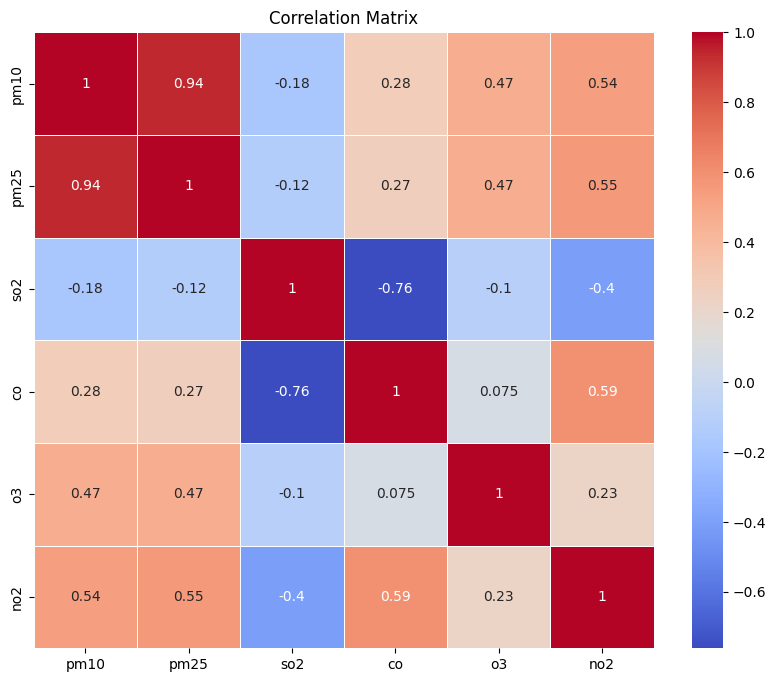

In [95]:
# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(merge_polutan.loc[:, merge_polutan.columns != 'tanggal'].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [96]:
imputed_data_polutan_meteorologi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 2023-01-01 to 2024-10-31
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm10         731 non-null    float64
 1   pm25         731 non-null    float64
 2   so2          731 non-null    float64
 3   co           731 non-null    float64
 4   o3           731 non-null    float64
 5   no2          731 non-null    float64
 6   Tavg         731 non-null    float64
 7   RH_avg       731 non-null    float64
 8   RR           731 non-null    float64
 9   ss           731 non-null    float64
 10  ff_avg       731 non-null    float64
 11  DDD_CAR_cos  731 non-null    float64
 12  DDD_CAR_sin  731 non-null    float64
dtypes: float64(13)
memory usage: 96.1+ KB


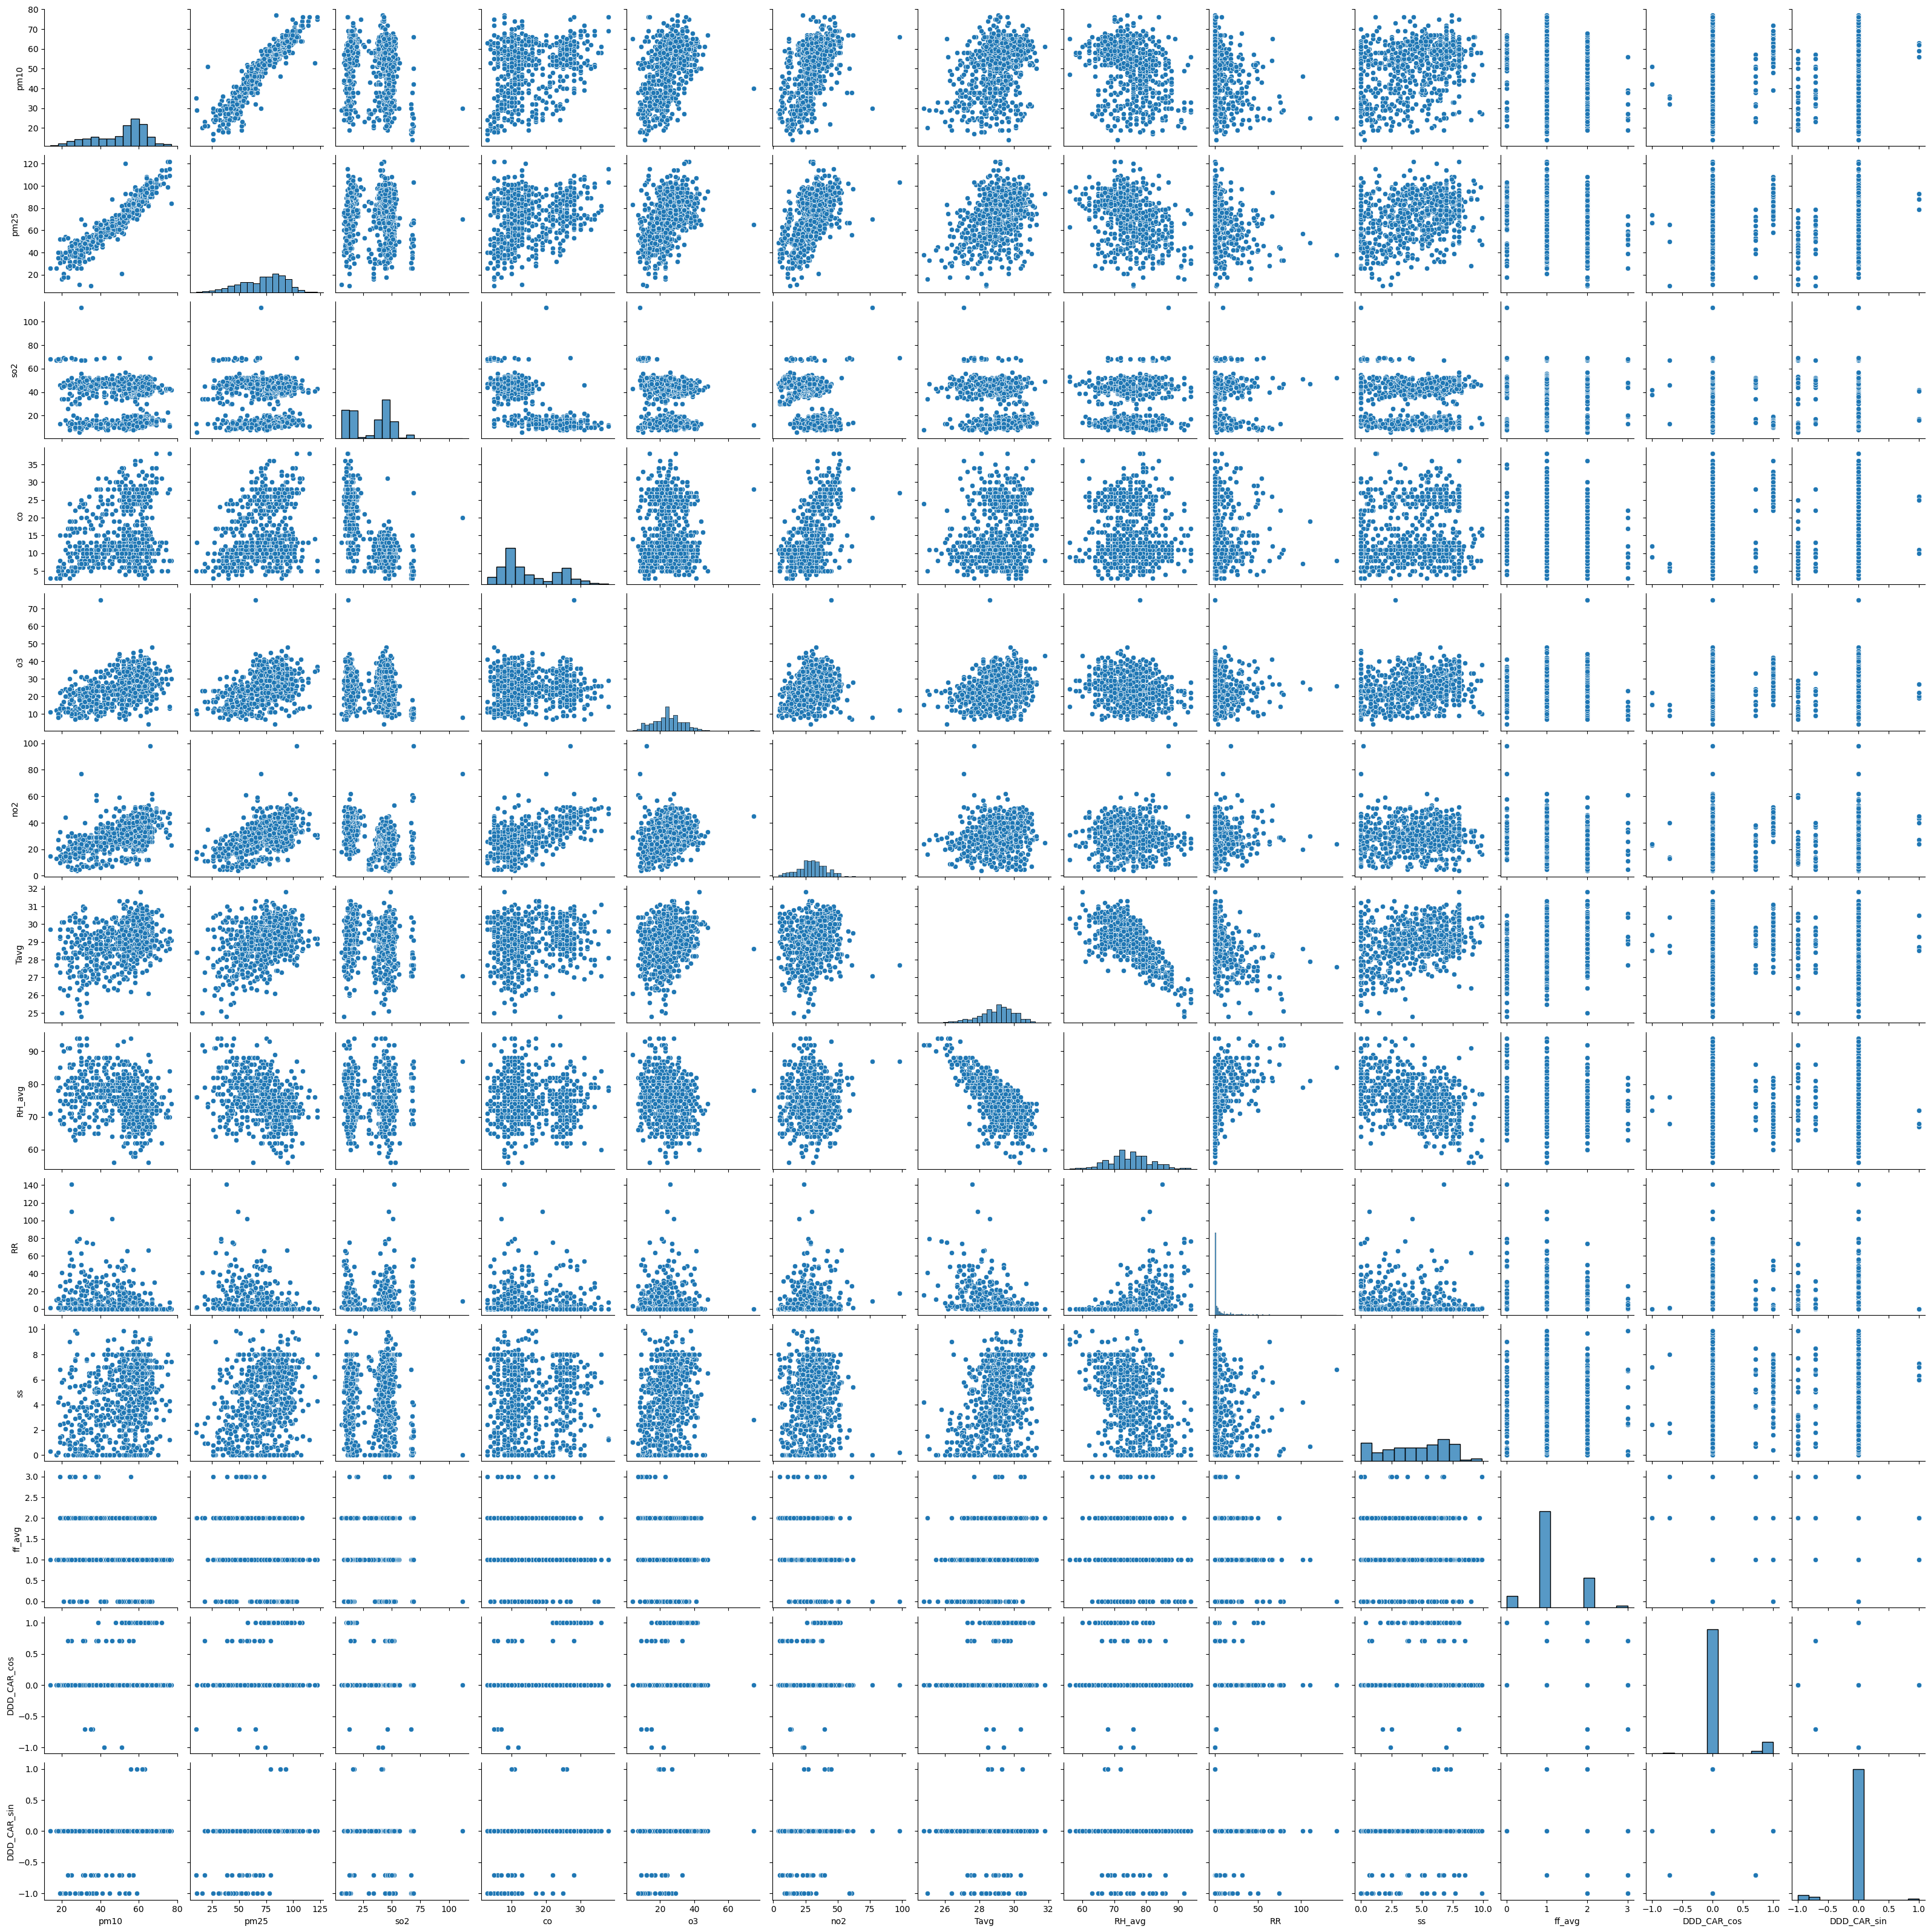

In [97]:
sns.pairplot(imputed_data_polutan_meteorologi)

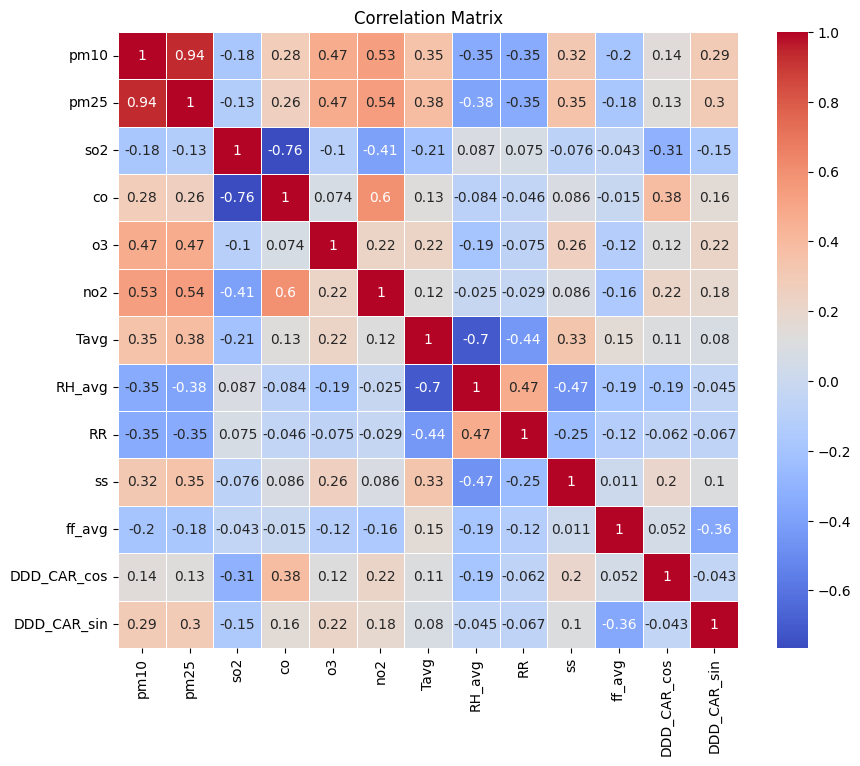

In [98]:
# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(imputed_data_polutan_meteorologi.loc[:].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [99]:
imputed_data_polutan_meteorologi

pm10  pm25   so2    co    o3   no2  Tavg  RH_avg    RR   ss  \
tanggal                                                                   
2023-01-01  44.0  55.0  47.0  10.0  24.0   9.0  26.3    87.0  14.5  0.0   
2023-01-02  32.0  43.0  52.0   9.0  24.0   8.0  27.5    81.0  31.5  0.7   
2023-01-03  31.0  35.0  49.0   9.0  12.0   7.0  26.6    82.0   0.5  0.0   
2023-01-04  30.0  47.0  53.0  11.0  15.0   9.0  26.4    86.0   2.4  2.1   
2023-01-05  38.0  50.0  50.0  13.0  26.0  11.0  27.4    83.0  35.3  4.9   
...          ...   ...   ...   ...   ...   ...   ...     ...   ...  ...   
2024-10-27  54.0  78.0  19.0  23.0  34.0  31.0  30.1    71.0   0.0  8.0   
2024-10-28  60.0  83.0  10.0  26.0  37.0  36.0  30.2    67.0   0.0  8.0   
2024-10-29  59.0  75.0  11.0  28.0  29.0  41.0  30.8    69.0   0.0  0.6   
2024-10-30  62.0  86.0  11.0  27.0  36.0  44.0  30.9    65.0   0.0  6.5   
2024-10-31  59.0  78.0  11.0  28.0  29.0  45.0  30.4    70.0   0.0  6.5   

            ff_avg  DDD_CAR_cos  DDD_CAR_sin  
tanggal                                       
2023-01-01     1.0     0.000000     0.000000  
2023-01-02     2.0     0.707107    -0.707107  
2023-01-03     1.0     0.000000     0.000000  
2023-01-04     1.0     0.000000     0.000000  
2023-01-05     2.0     0.000000     0.000000  
...            ...          ...          ...  
2024-10-27     2.0     0.000000     0.000000  
2024-10-28     1.0     0.000000     0.000000  
2024-10-29     1.0     0.000000     0.000000  
2024-10-30     1.0     0.000000     0.000000  
2024-10-31     1.0     0.000000     0.000000  

[731 rows x 13 columns]

In [ ]:
# imputed_data_polutan_meteorologi.to_csv('./preprocessed_main_data_dki1_kemayoran_v2.csv', sep=';', decimal='.', index=True)

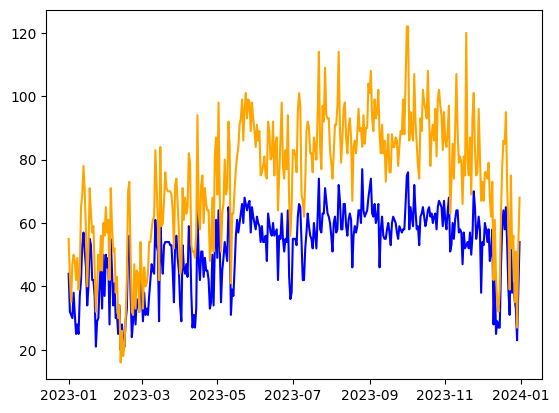

In [ ]:
# impute with meteorological
plt.plot(imputed_data_polutan_meteorologi.loc[imputed_data_polutan_meteorologi.index < date(2024, 1, 1), 'pm10'], label='pm10', c='blue')
plt.plot(imputed_data_polutan_meteorologi.loc[imputed_data_polutan_meteorologi.index < date(2024, 1, 1), 'pm25'], label='pm25', c='orange')

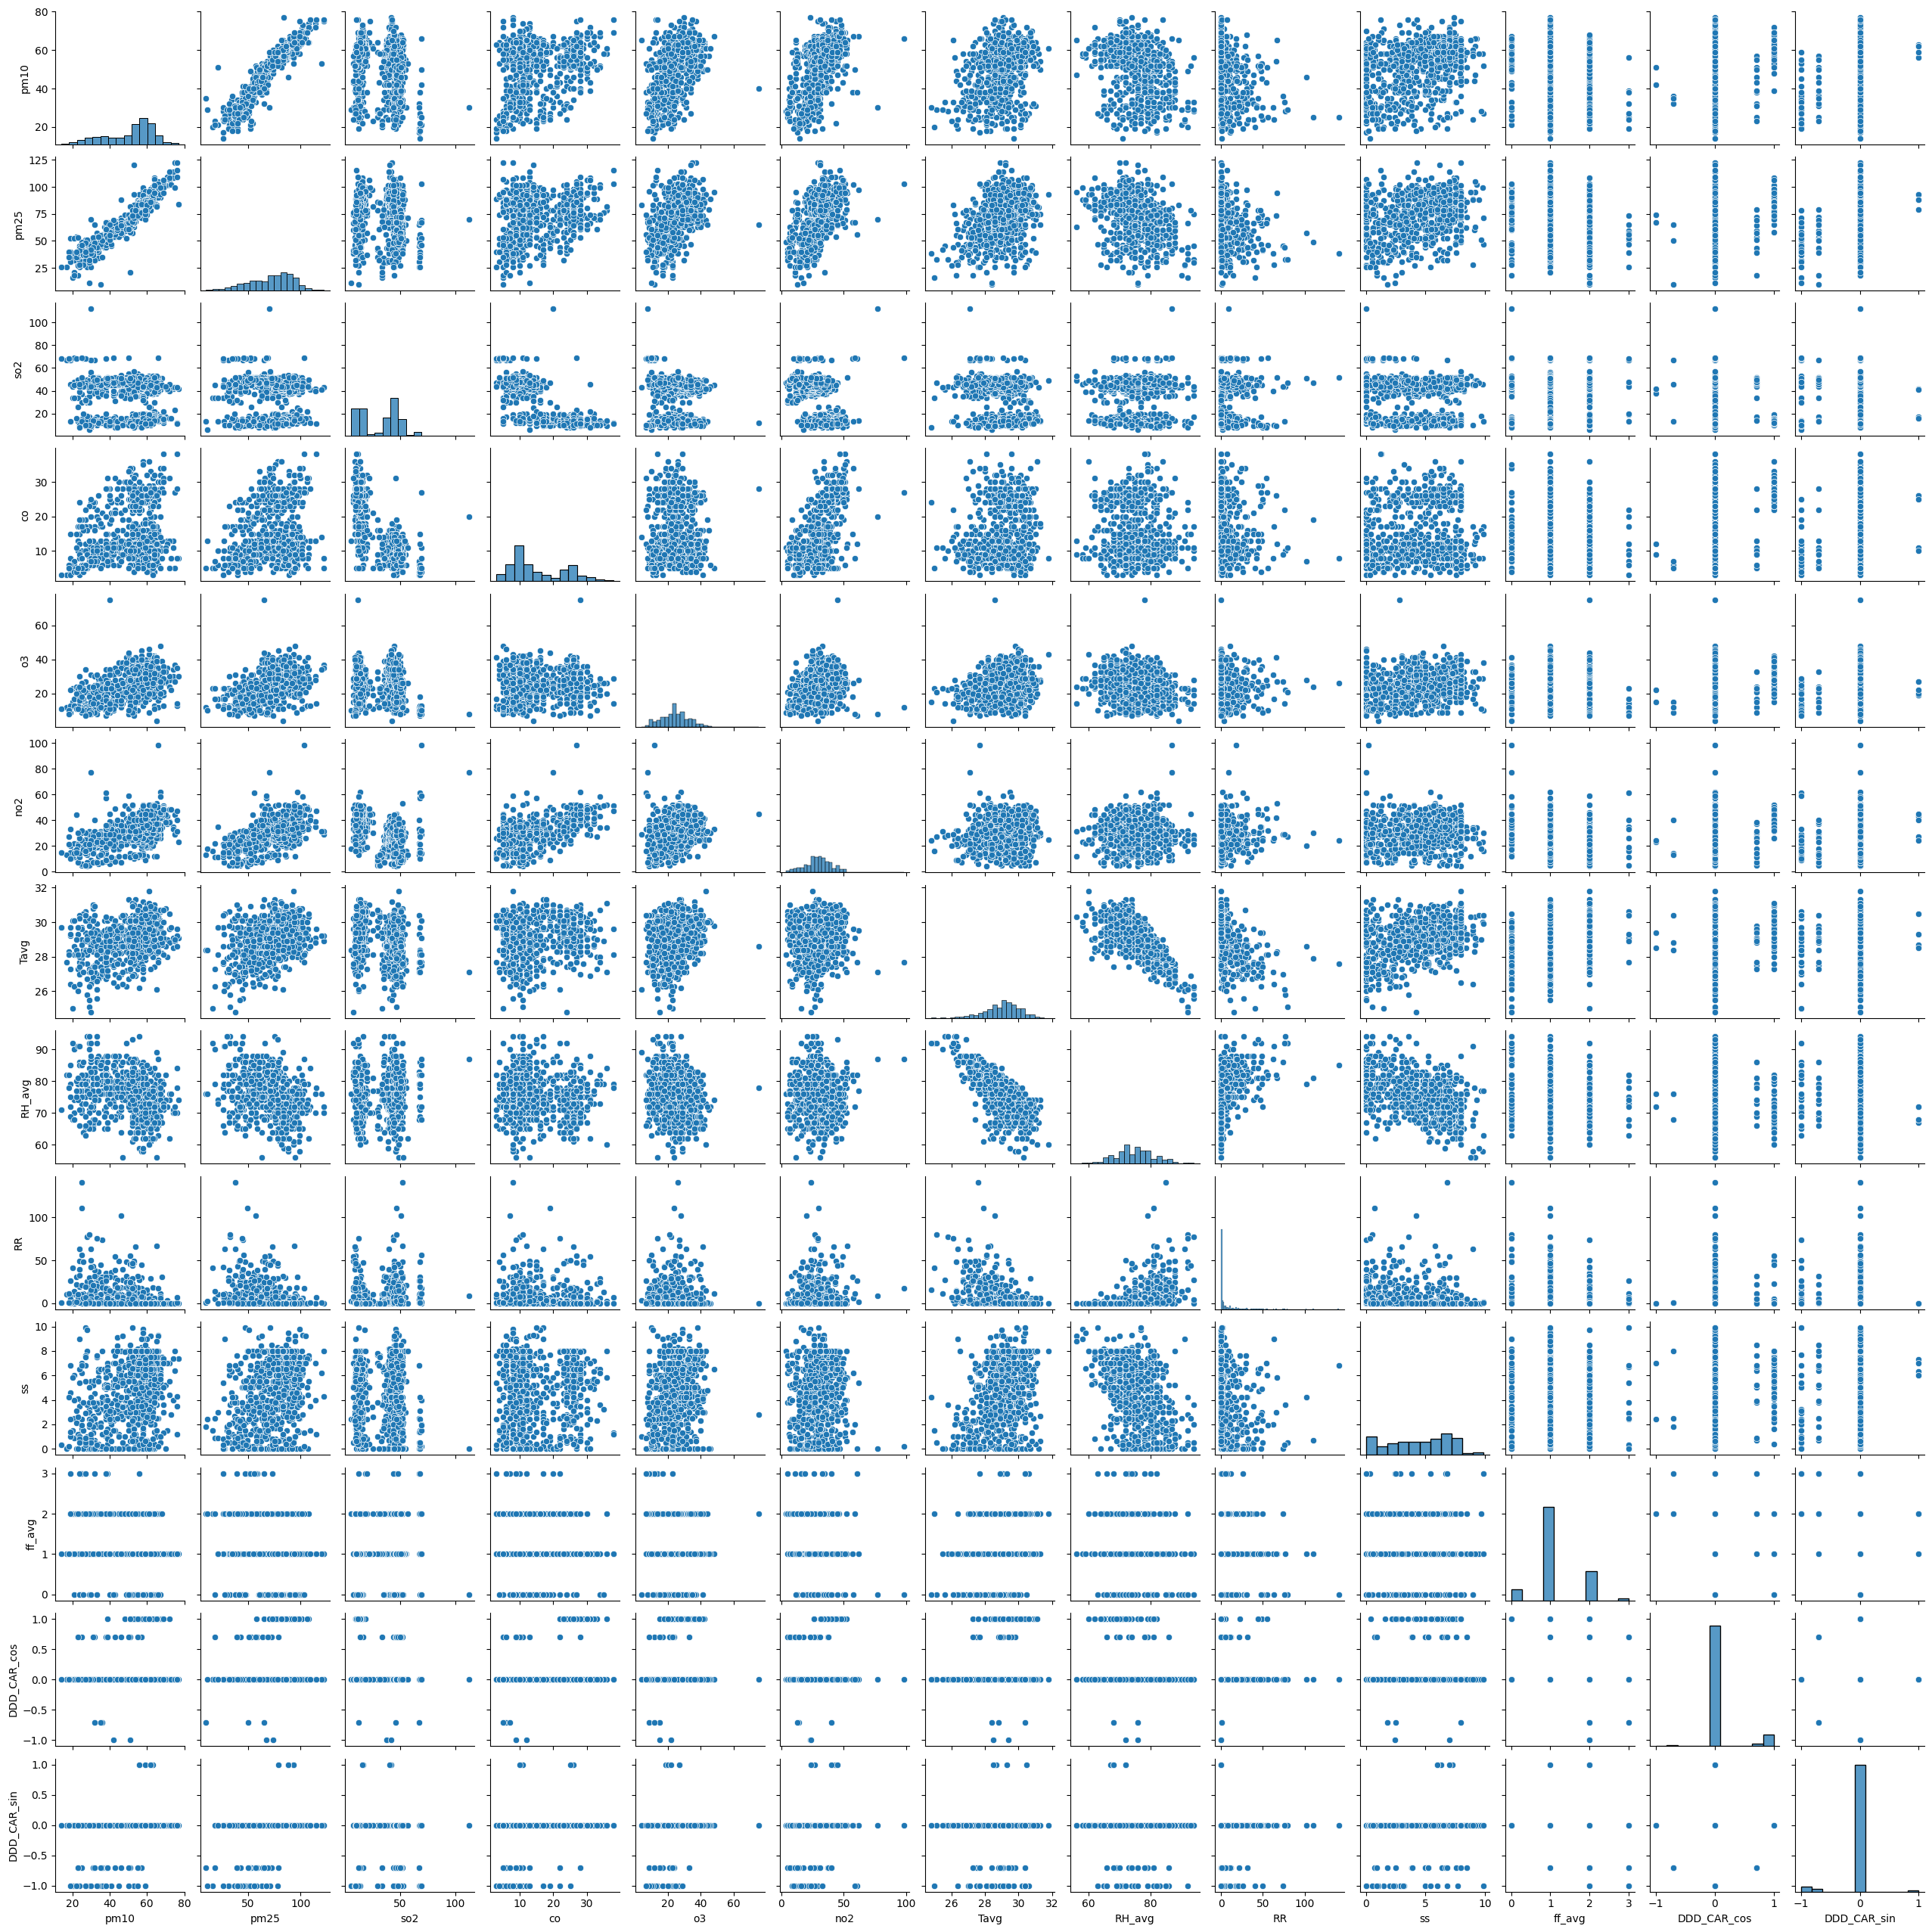

In [4]:
sns.pairplot(imputed_data_polutan_meteorologi, height=2)

In [ ]:
imputed_data_polutan_meteorologi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 2023-01-01 to 2024-12-31
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pm10        731 non-null    float64
 1   pm25        731 non-null    float64
 2   so2         731 non-null    float64
 3   co          731 non-null    float64
 4   o3          731 non-null    float64
 5   no2         731 non-null    float64
 6   Tavg_km     731 non-null    float64
 7   RH_avg_km   731 non-null    float64
 8   RR_km       731 non-null    float64
 9   ss_km       731 non-null    float64
 10  ff_avg_km   731 non-null    float64
 11  DDD_CAR_km  731 non-null    float64
 12  Tavg_tp     731 non-null    float64
 13  RH_avg_tp   731 non-null    float64
 14  RR_tp       731 non-null    float64
 15  ss_tp       731 non-null    float64
 16  ff_avg_tp   731 non-null    float64
 17  DDD_CAR_tp  731 non-null    float64
dtypes: float64(18)
memory usage: 108.5+ KB


# Temporary

In [168]:
from sklearn.preprocessing import MinMaxScaler
import math


In [167]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

features = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'Tavg', 'RH_avg', 'ss', 'ff_avg', 'DDD_CAR_cos', 'DDD_CAR_sin']

targets = ['pm25']

data_x = imputed_data_polutan_meteorologi[features]
data_y = imputed_data_polutan_meteorologi[targets]

data_x_scaled = scaler_x.fit_transform(data_x)
data_y_scaled = scaler_y.fit_transform(data_y)


In [165]:
data_x_scaled[4][0]

np.float64(0.38095238095238093)

In [161]:
data_x_scaled

array([[0.47619048, 0.40178571, 0.38679245, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.28571429, 0.29464286, 0.43396226, ..., 0.66666667, 0.85355339,
        0.14644661],
       [0.26984127, 0.22321429, 0.40566038, ..., 0.33333333, 0.5       ,
        0.5       ],
       ...,
       [0.71428571, 0.58035714, 0.04716981, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.76190476, 0.67857143, 0.04716981, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.71428571, 0.60714286, 0.04716981, ..., 0.33333333, 0.5       ,
        0.5       ]], shape=(731, 12))

In [169]:
features = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'Tavg', 'RH_avg', 'ss', 'ff_avg', 'DDD_CAR_cos', 'DDD_CAR_sin']

targets = ['pm25']

WINDOW_SIZE = 7
HORIZON = 7

data_x = imputed_data_polutan_meteorologi[features]
data_y = imputed_data_polutan_meteorologi[targets]

data_x_scaled = scaler_x.fit_transform(data_x)
data_y_scaled = scaler_y.fit_transform(data_y)

X = []
y = []

for i in range(len(imputed_data_polutan_meteorologi) - WINDOW_SIZE - HORIZON + 1):
    X.append(data_x_scaled[i:i+WINDOW_SIZE])
    y.append(data_y_scaled[i+WINDOW_SIZE:i+WINDOW_SIZE + HORIZON])

training_data_len = math.ceil(len(X)* 0.8)

#splitting train
x_train = X[:training_data_len]
y_train = y[:training_data_len]

# Val set
val_test_len = len(X[training_data_len:])
val_len = math.ceil(val_test_len/2)

x_val = X[training_data_len: training_data_len+val_len]
y_val = y[training_data_len: training_data_len+val_len]

# Test set
x_test = X[training_data_len+val_len: ]
y_test = y[training_data_len+val_len: ]

# Reshaping
x_train, y_train = np.array(x_train), np.array(y_train)

x_val, y_val = np.array(x_val), np.array(y_val)

x_test, y_test = np.array(x_test), np.array(y_test)

y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))
y_val = y_val.reshape((y_val.shape[0], y_val.shape[1]))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))

In [ ]:
x_train[0]


array([[0.47619048, 0.40178571, 0.38679245, 0.2       , 0.28169014,
        0.05319149, 0.21428571, 0.81578947, 0.        , 0.33333333,
        0.5       , 0.5       ],
       [0.28571429, 0.29464286, 0.43396226, 0.17142857, 0.28169014,
        0.04255319, 0.38571429, 0.65789474, 0.07070707, 0.66666667,
        0.85355339, 0.14644661],
       [0.26984127, 0.22321429, 0.40566038, 0.17142857, 0.11267606,
        0.03191489, 0.25714286, 0.68421053, 0.        , 0.33333333,
        0.5       , 0.5       ],
       [0.25396825, 0.33035714, 0.44339623, 0.22857143, 0.15492958,
        0.05319149, 0.22857143, 0.78947368, 0.21212121, 0.33333333,
        0.5       , 0.5       ],
       [0.38095238, 0.35714286, 0.41509434, 0.28571429, 0.30985915,
        0.07446809, 0.37142857, 0.71052632, 0.49494949, 0.66666667,
        0.5       , 0.5       ],
       [0.26984127, 0.33928571, 0.36792453, 0.2       , 0.12676056,
        0.03191489, 0.68571429, 0.31578947, 0.22222222, 0.33333333,
        0.5       ,

In [175]:
scaler_x.inverse_transform(x_train[0])

array([[44.        , 55.        , 47.        , 10.        , 24.        ,
         9.        , 26.3       , 87.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [32.        , 43.        , 52.        ,  9.        , 24.        ,
         8.        , 27.5       , 81.        ,  0.7       ,  2.        ,
         0.70710678, -0.70710678],
       [31.        , 35.        , 49.        ,  9.        , 12.        ,
         7.        , 26.6       , 82.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [30.        , 47.        , 53.        , 11.        , 15.        ,
         9.        , 26.4       , 86.        ,  2.1       ,  1.        ,
         0.        ,  0.        ],
       [38.        , 50.        , 50.        , 13.        , 26.        ,
        11.        , 27.4       , 83.        ,  4.9       ,  2.        ,
         0.        ,  0.        ],
       [31.        , 48.        , 45.        , 10.        , 13.        ,
         7.        , 2